<a href="https://colab.research.google.com/github/phfrebelo/aiml-portfolio/blob/main/INN_ReneWind_Main_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

# **Installing and Importing the necessary libraries**

In [1]:
# Installing the libraries with the specified version
!pip install --no-deps tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.3 seaborn==0.13.2 numpy==1.26.4 pandas==2.2.2 -q --user --no-warn-script-location

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 913.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 100.1 MB/s eta 0:00:00


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [2]:
# Library for data manipulation and analysis.
import pandas as pd

# Fundamental package for scientific computing.
import numpy as np

#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split

#Imports the Matplotlib library for creating visualizations.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Imports the Seaborn library for statistical data visualization.
import seaborn as sns

# Time related functions.
import time

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report

#Imports metrics from
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight

#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading the Data**

In [3]:
# Import dataset from google.colab drive
from google.colab import drive
import os

# Mount Google Drive ONCE
drive.mount('/content/drive', force_remount=True)

# Define base folder where your files are stored
base_path = "/content/drive/MyDrive/Colab Notebooks/Introduction to Neural Networks"

# Build full paths to the CSV files
train_path = os.path.join(base_path, "Train.csv")
test_path  = os.path.join(base_path, "Test.csv")

# Read both files
if os.path.exists(train_path) and os.path.exists(test_path):
    data_train = pd.read_csv(train_path)
    data_test  = pd.read_csv(test_path)
    print("Files loaded successfully:")
    print("Train shape:", data_train.shape)
    print("Test shape :", data_test.shape)
else:
    print("One or both files were not found.")
    print("Train path:", train_path)
    print("Test path :", test_path)

# Copy the training and testing data to another variable to avoid any changes to the original data
data_train = data_train.copy()
data_test = data_test.copy()

Mounted at /content/drive
Files loaded successfully:
Train shape: (20000, 41)
Test shape : (5000, 41)


# **Data Overview**

View the first and last 5 rows of the train dataset

In [4]:
data_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [5]:
data_train.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071318,-1.088279,-0.796174,-3.011720,-2.287540,2.807310,0.481428,0.105171,-0.586599,-2.899398,...,-8.273996,5.745013,0.589014,-0.649988,-3.043174,2.216461,0.608723,0.178193,2.927755,1
19996,2.890264,2.483069,5.643919,0.937053,-1.380870,0.412051,-1.593386,-5.762498,2.150096,0.272302,...,-4.159092,1.181466,-0.742412,5.368979,-0.693028,-1.668971,3.659954,0.819863,-1.987265,0
19997,-3.896979,-3.942407,-0.351364,-2.417462,1.107546,-1.527623,-3.519882,2.054792,-0.233996,-0.357687,...,7.112162,1.476080,-3.953710,1.855555,5.029209,2.082588,-6.409304,1.477138,-0.874148,0
19998,-3.187322,-10.051662,5.695955,-4.370053,-5.354758,-1.873044,-3.947210,0.679420,-2.389254,5.456756,...,0.402812,3.163661,3.752095,8.529894,8.450626,0.203958,-7.129918,4.249394,-6.112267,0
19999,-2.686903,1.961187,6.137088,2.600133,2.657241,-4.290882,-2.344267,0.974004,-1.027462,0.497421,...,6.620811,-1.988786,-1.348901,3.951801,5.449706,-0.455411,-2.202056,1.678229,-1.974413,0


In [6]:
data_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


In [7]:
data_test.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
4995,-5.120451,1.634804,1.251259,4.035944,3.291204,-2.932230,-1.328662,1.754066,-2.984586,1.248633,...,9.979118,0.063438,0.217281,3.036388,2.109323,-0.557433,1.938718,0.512674,-2.694194,0
4996,-5.172498,1.171653,1.579105,1.219922,2.529627,-0.668648,-2.618321,-2.000545,0.633791,-0.578938,...,4.423900,2.603811,-2.152170,0.917401,2.156586,0.466963,0.470120,2.196756,-2.376515,0
4997,-1.114136,-0.403576,-1.764875,-5.879475,3.571558,3.710802,-2.482952,-0.307614,-0.921945,-2.999141,...,3.791778,7.481506,-10.061396,-0.387166,1.848509,1.818248,-1.245633,-1.260876,7.474682,0
4998,-1.703241,0.614650,6.220503,-0.104132,0.955916,-3.278706,-1.633855,-0.103936,1.388152,-1.065622,...,-4.100352,-5.949325,0.550372,-1.573640,6.823936,2.139307,-4.036164,3.436051,0.579249,0
4999,-0.603701,0.959550,-0.720995,8.229574,-1.815610,-2.275547,-2.574524,-1.041479,4.129645,-2.731288,...,2.369776,-1.062408,0.790772,4.951955,-7.440825,-0.069506,-0.918083,-2.291154,-5.362891,0


## Understand the shape of the dataset

In [8]:
data_train.shape

(20000, 41)

There are 20,000 observations and 41 columns in the train dataset.

In [9]:
data_test.shape

(5000, 41)

There are 5,000 observations and 41 coluns in the test dataset.

## Check the data types of the columns for the train dataset

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

Target column is the only one with an int datatype so let's convert into float

In [11]:
data_train['Target'] = data_train['Target'].astype(float)

Now check the data types for the test dataset

In [12]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

Similar to the train dataset, the Target column needs to be converted into float

In [13]:
data_test['Target'] = data_test['Target'].astype(float)

## Check for duplicate values

In [23]:
# Check number of completely duplicated rows
print("Duplicate rows in Train:", data_train.duplicated().sum())
print("Duplicate rows in Test:", data_test.duplicated().sum())

Duplicate rows in Train: 0
Duplicate rows in Test: 0


There are no duplicate rows in the training and testing datasets — meaning every observation is unique.

## Check for missing values

In [24]:
# Check for missing values in the train data
data_train.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [25]:
# Check for missing values in the test data
data_test.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [26]:
# Summarize how many total missing values exist
print("\nTotal missing values:")
print(f"Train: {data_train.isnull().sum().sum()} | Test: {data_test.isnull().sum().sum()}")

# Display columns that have missing values only
missing_train = data_train.columns[data_train.isnull().any()].tolist()
missing_test = data_test.columns[data_test.isnull().any()].tolist()

print("\nColumns with missing values in Train:", missing_train)
print("Columns with missing values in Test:", missing_test)


Total missing values:
Train: 0 | Test: 0

Columns with missing values in Train: []
Columns with missing values in Test: []


## Handle the missing values

In [27]:
# Compute median from training data only
medians = data_train[['V1', 'V2']].median()

# Fill missing values in both datasets
data_train[['V1', 'V2']] = data_train[['V1', 'V2']].fillna(medians)
data_test[['V1', 'V2']] = data_test[['V1', 'V2']].fillna(medians)

In [28]:
print("Remaining missing values in Train:", data_train.isnull().sum().sum())
print("Remaining missing values in Test:", data_test.isnull().sum().sum())

Remaining missing values in Train: 0
Remaining missing values in Test: 0


# **Exploratory Data Analysis**

## Statistical Summary of the dataset

In [29]:
# Display full summary statistics for numeric columns
print("===== TRAIN DATASET SUMMARY =====")
print(data_train.describe(include='all').T)   # Transpose for better readability

print("\n===== TEST DATASET SUMMARY =====")
print(data_test.describe(include='all').T)

===== TRAIN DATASET SUMMARY =====
          count      mean       std        min       25%       50%       75%  \
V1      20000.0 -0.272425  3.440105 -11.876451 -2.735778 -0.747917  1.837349   
V2      20000.0  0.440458  3.149366 -12.319951 -1.637431  0.471536  2.542530   
V3      20000.0  2.484699  3.388963 -10.708139  0.206860  2.255786  4.566165   
V4      20000.0 -0.083152  3.431595 -15.082052 -2.347660 -0.135241  2.130615   
V5      20000.0 -0.053752  2.104801  -8.603361 -1.535607 -0.101952  1.340480   
V6      20000.0 -0.995443  2.040970 -10.227147 -2.347238 -1.000515  0.380330   
V7      20000.0 -0.879325  1.761626  -7.949681 -2.030926 -0.917179  0.223695   
V8      20000.0 -0.548195  3.295756 -15.657561 -2.642665 -0.389085  1.722965   
V9      20000.0 -0.016808  2.160568  -8.596313 -1.494973 -0.067597  1.409203   
V10     20000.0 -0.012998  2.193201  -9.853957 -1.411212  0.100973  1.477045   
V11     20000.0 -1.895393  3.124322 -14.832058 -3.922404 -1.921237  0.118906   
V12   

## Univariate analysis

In [30]:
# Function to plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## Distribution of Numerical Features

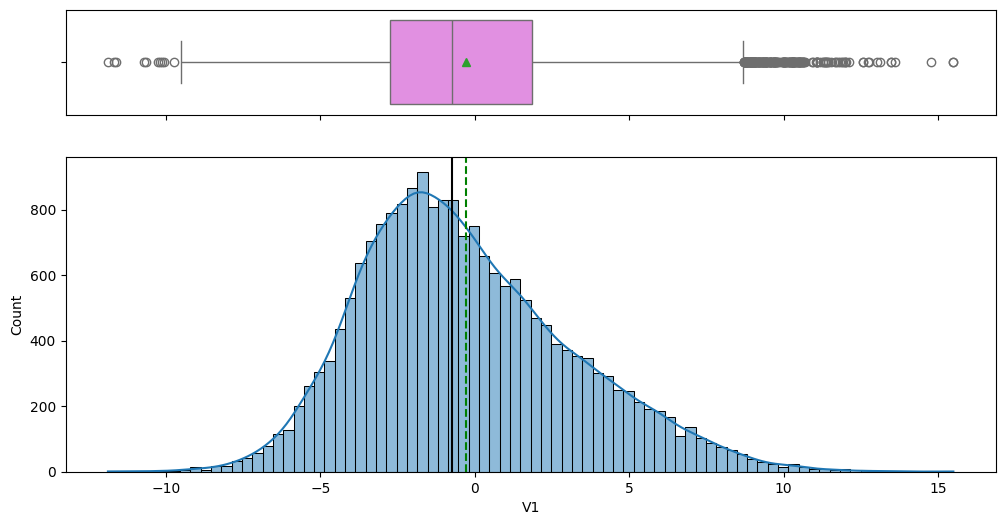

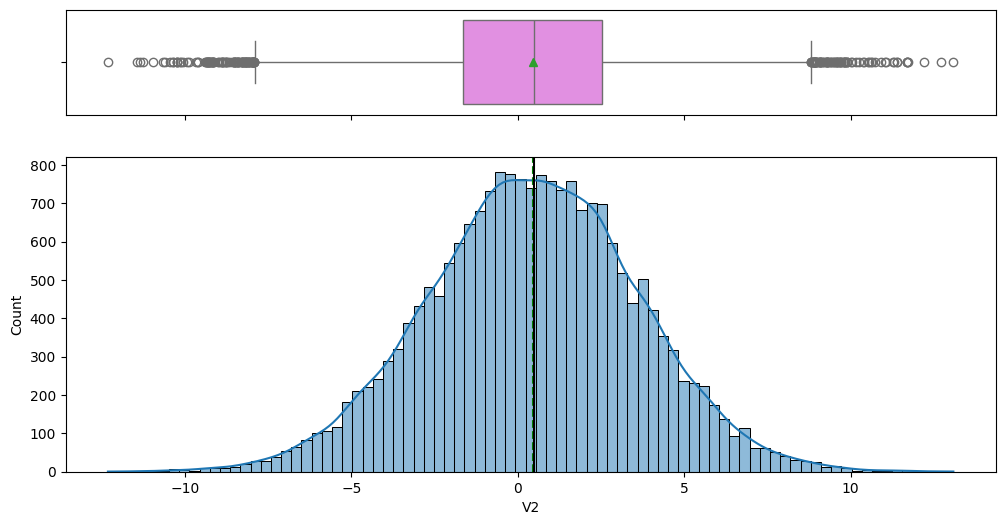

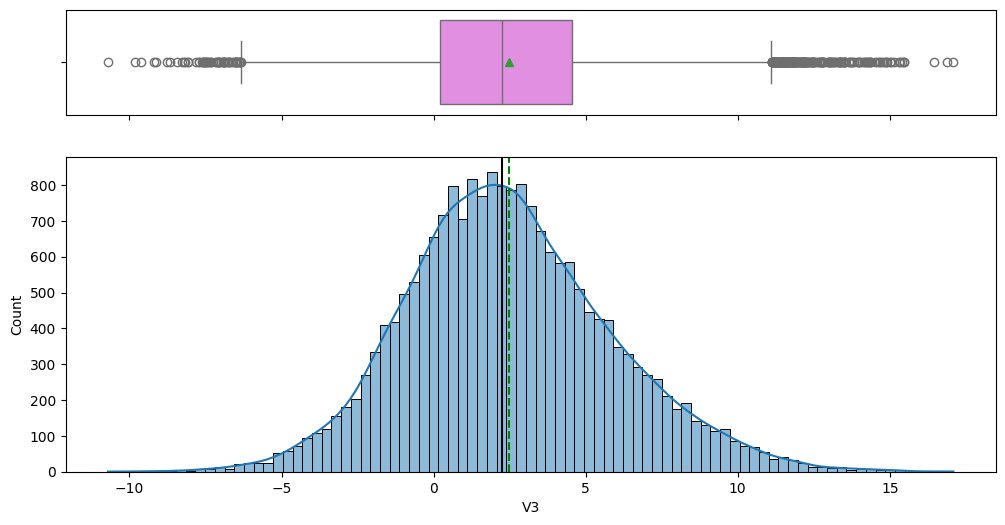

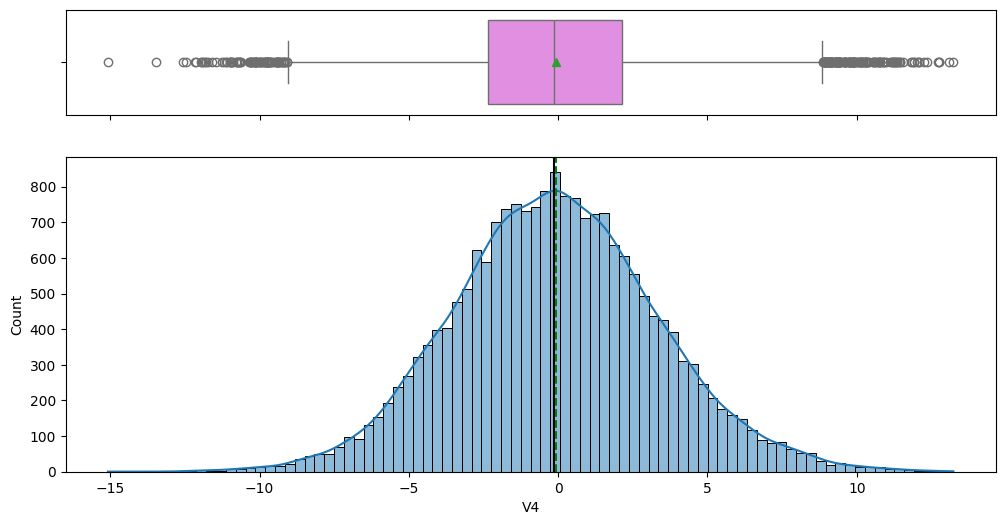

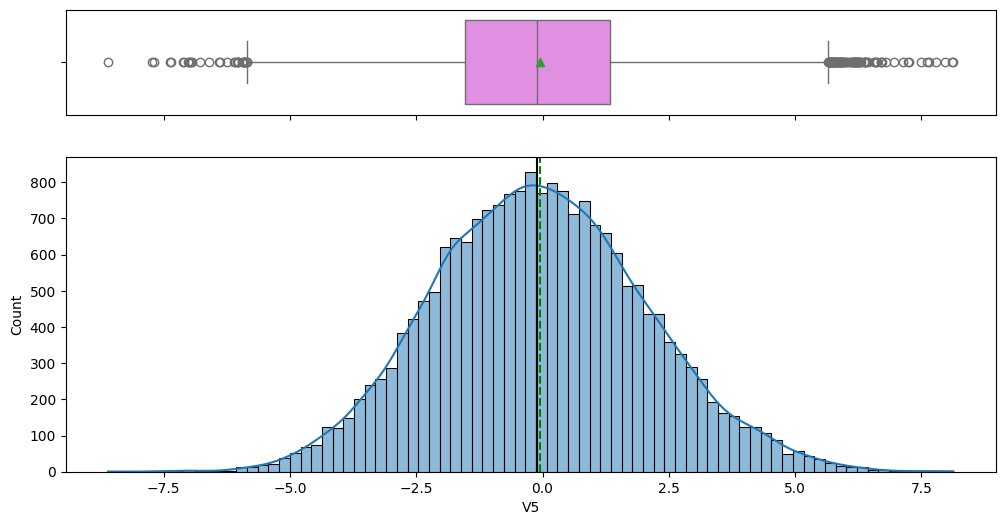

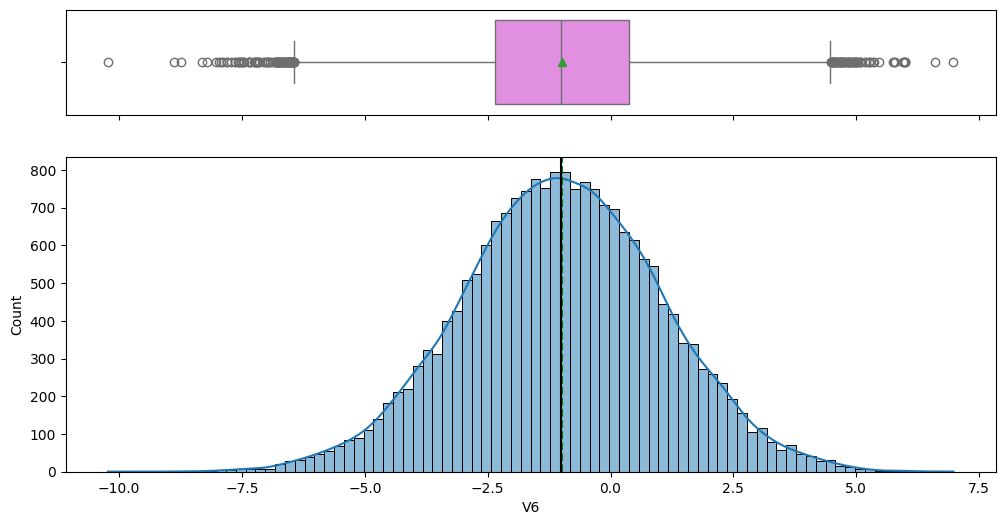

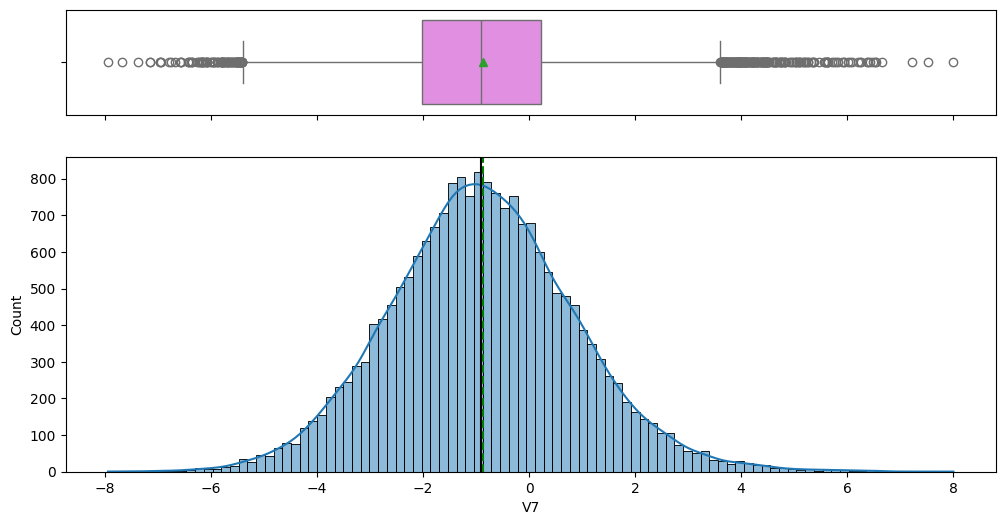

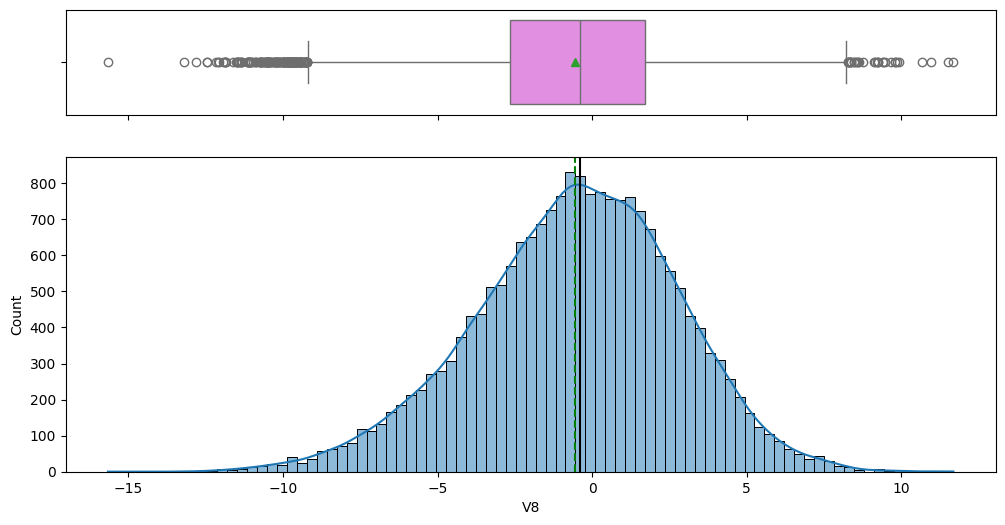

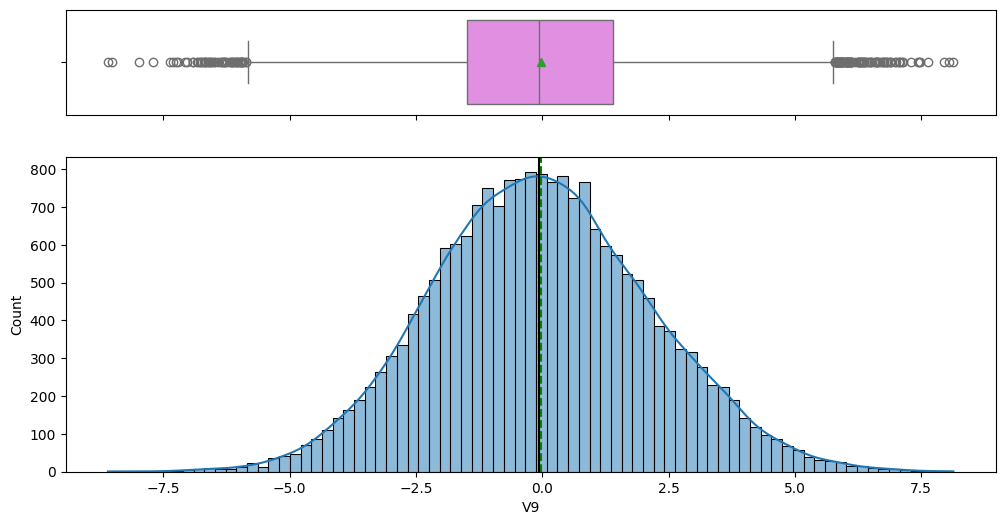

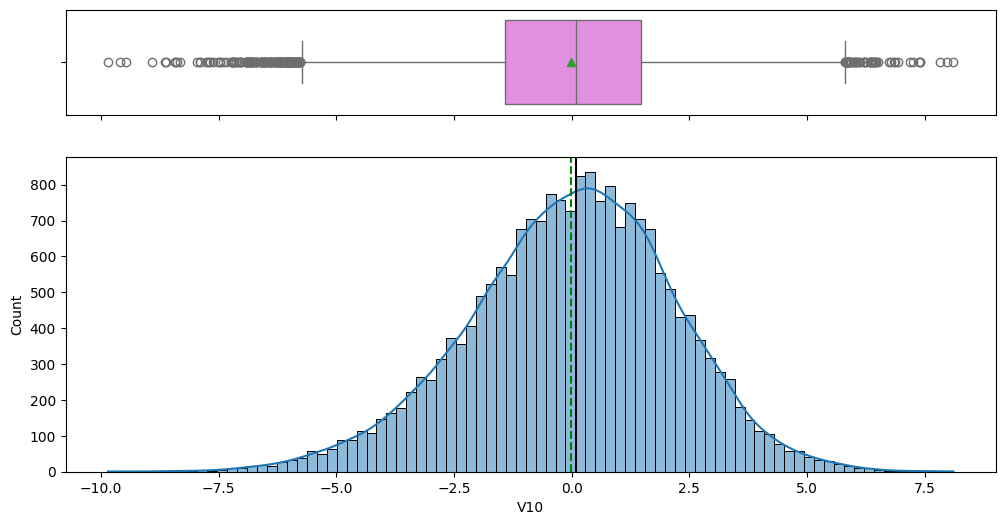

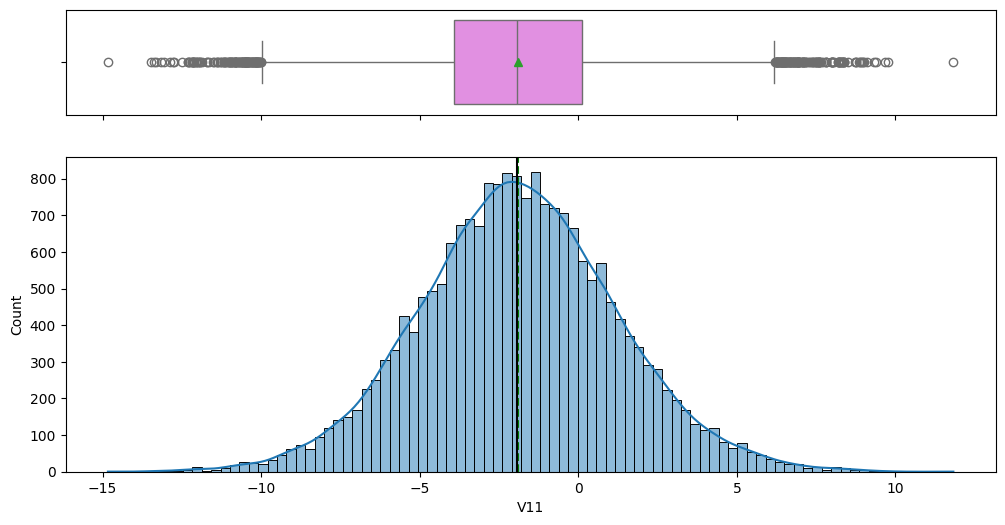

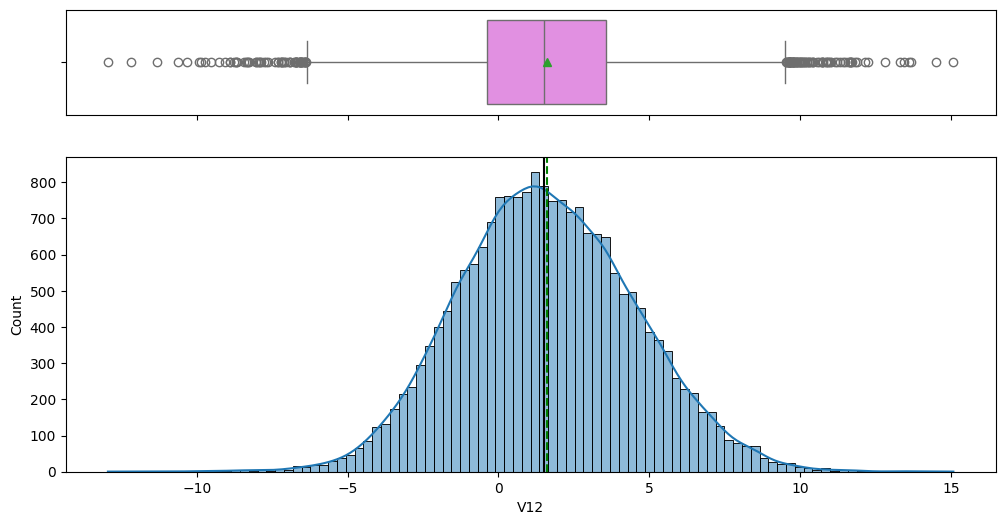

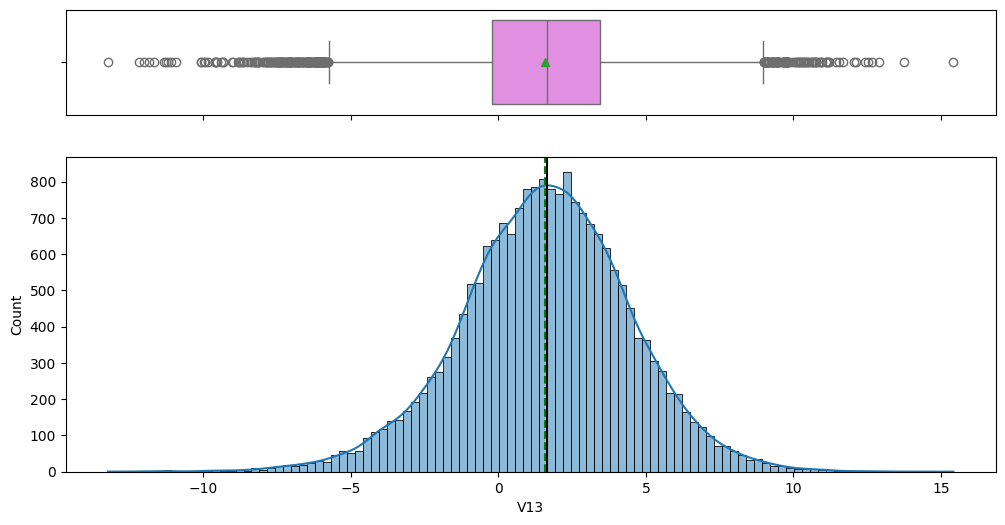

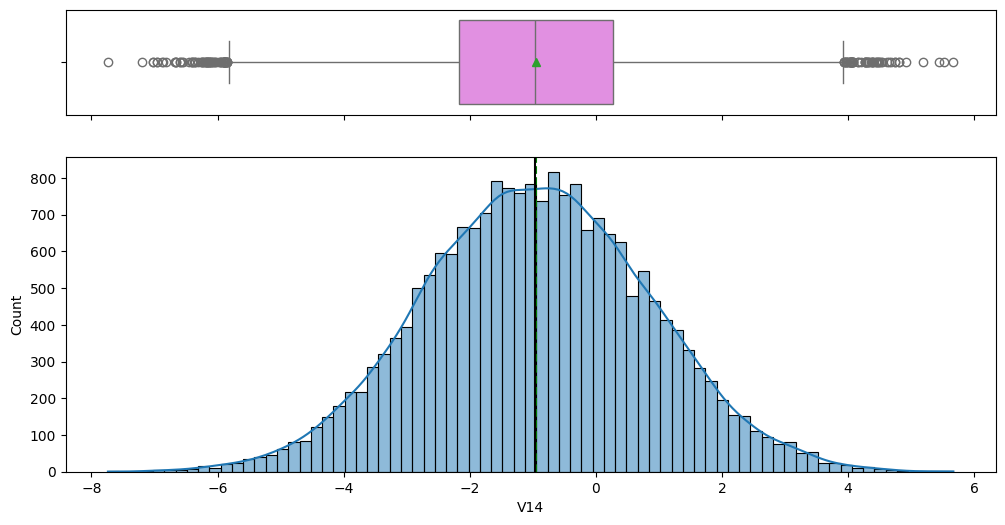

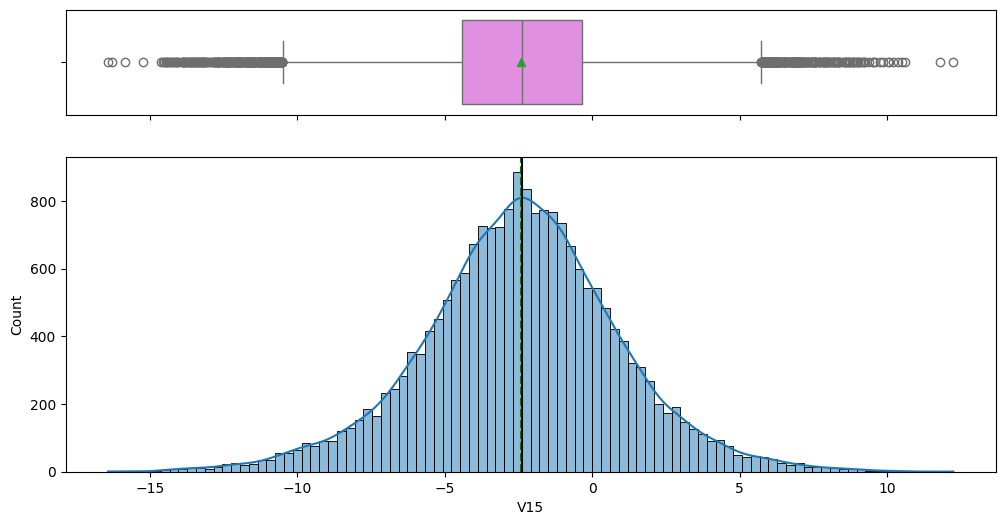

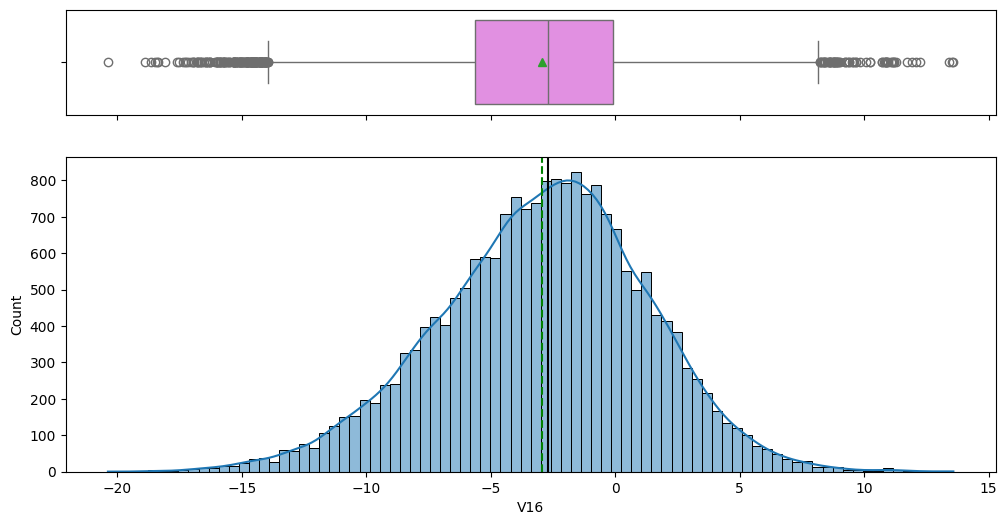

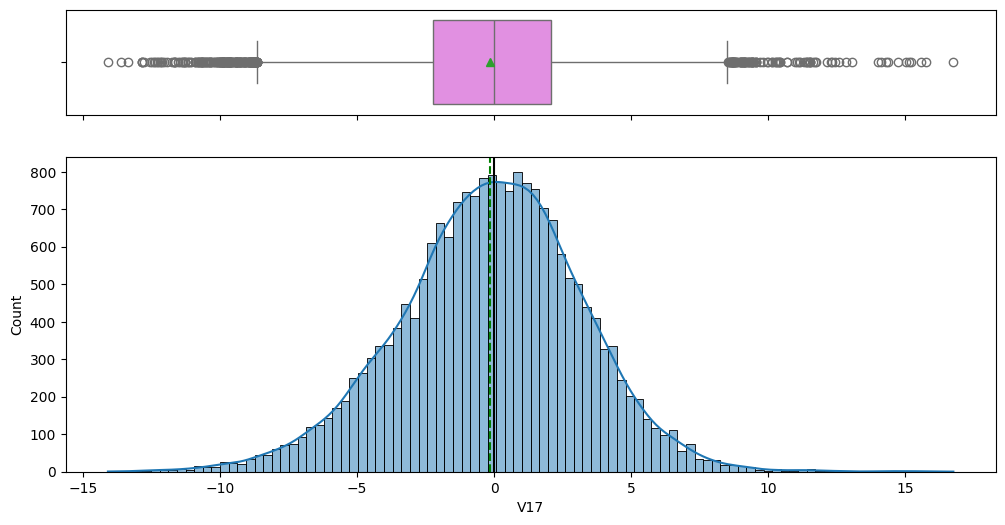

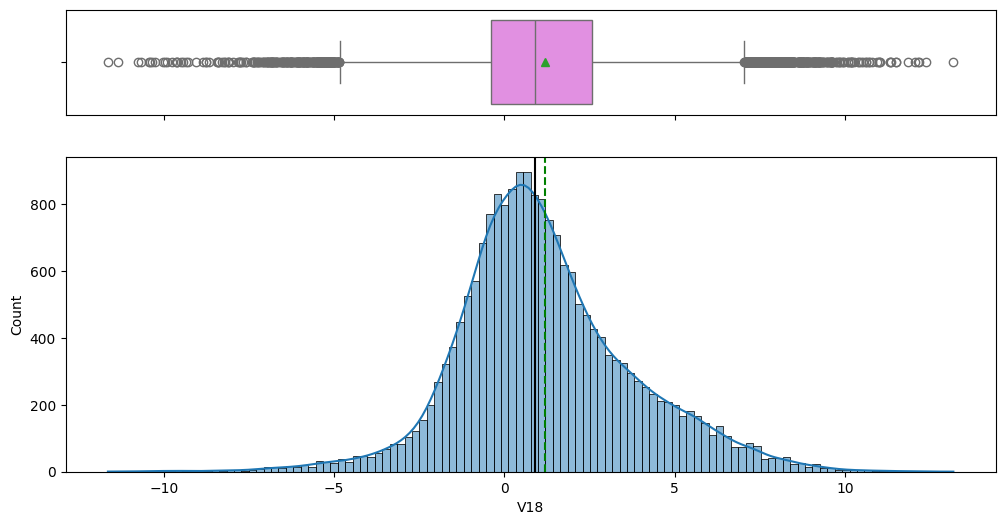

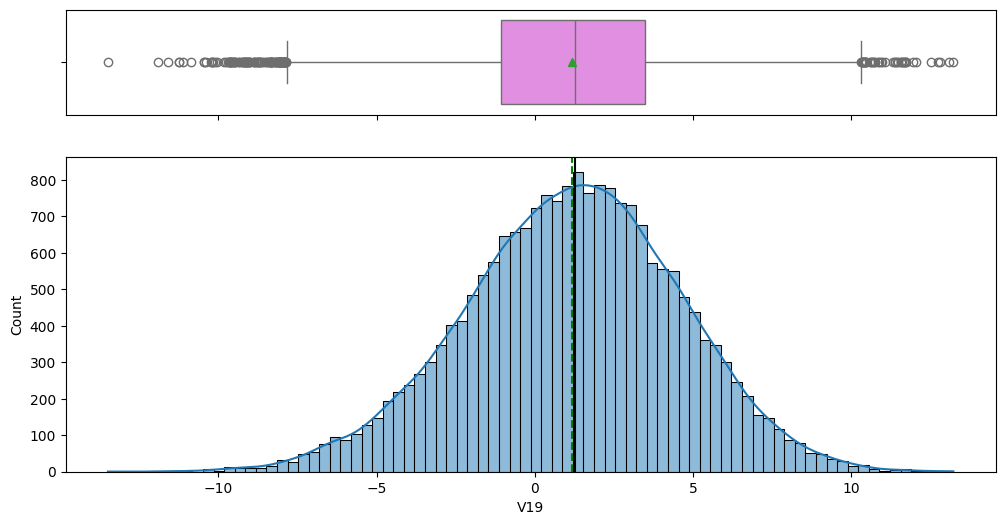

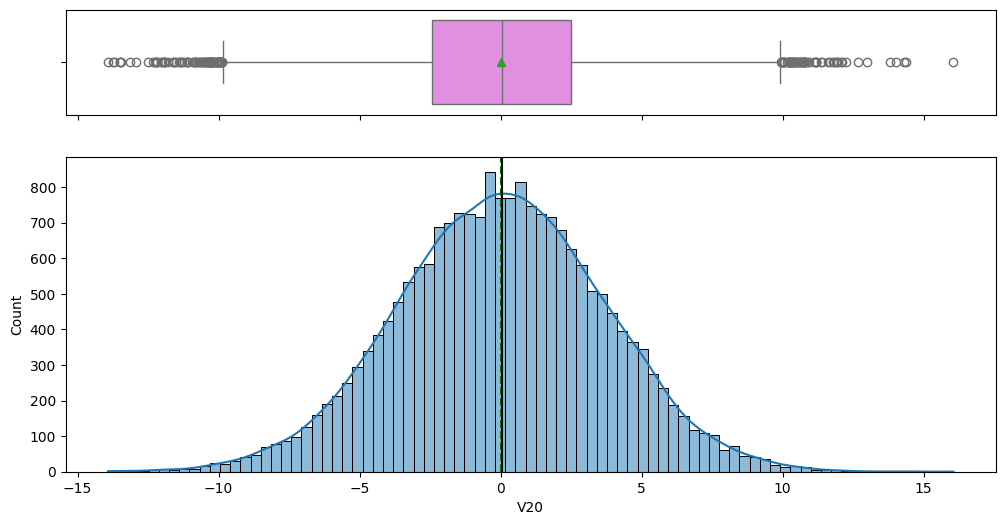

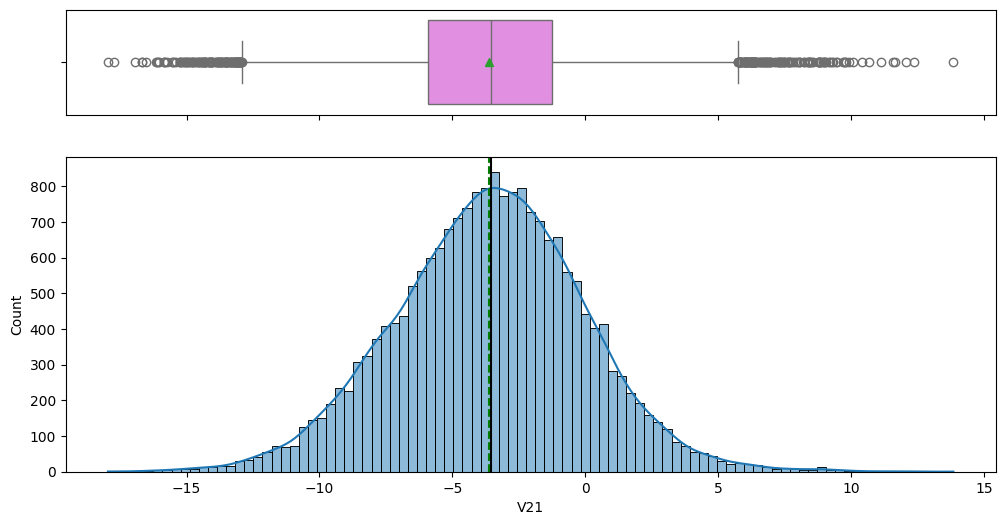

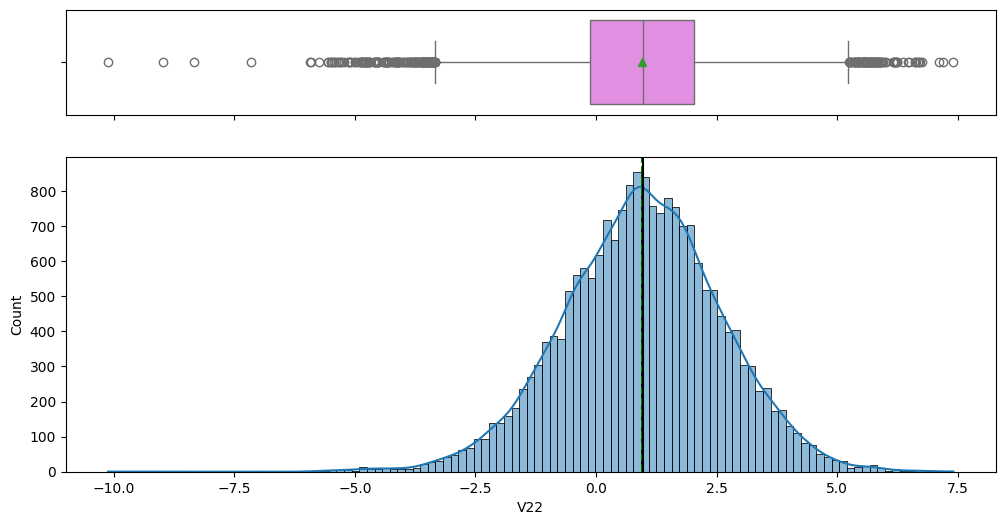

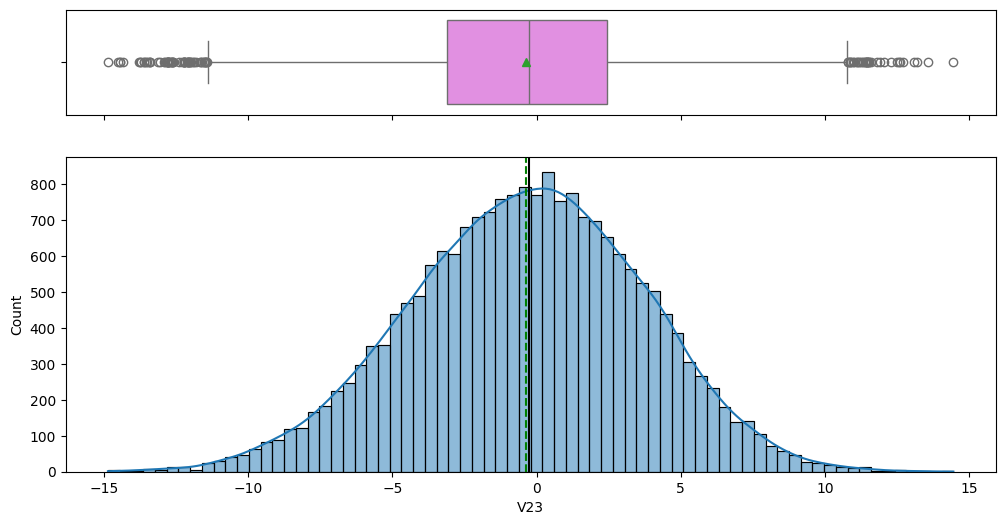

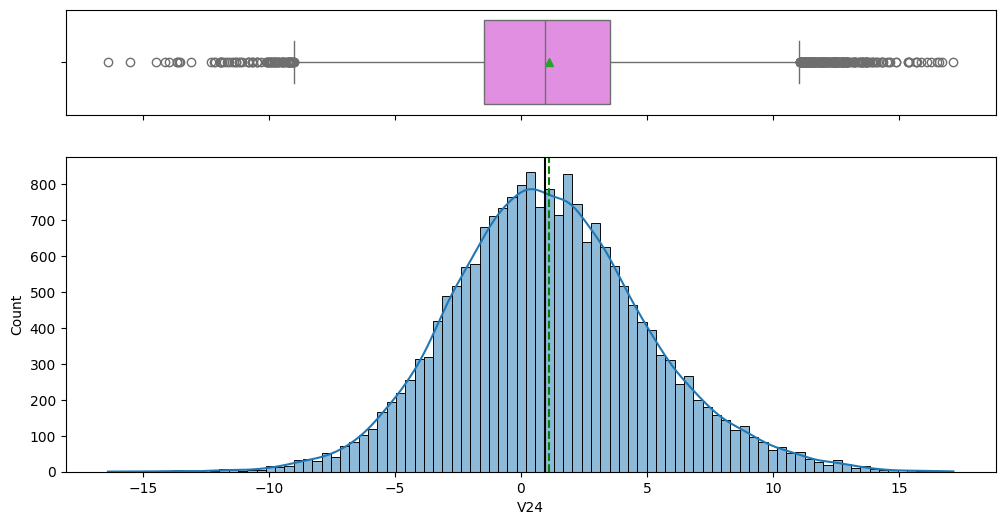

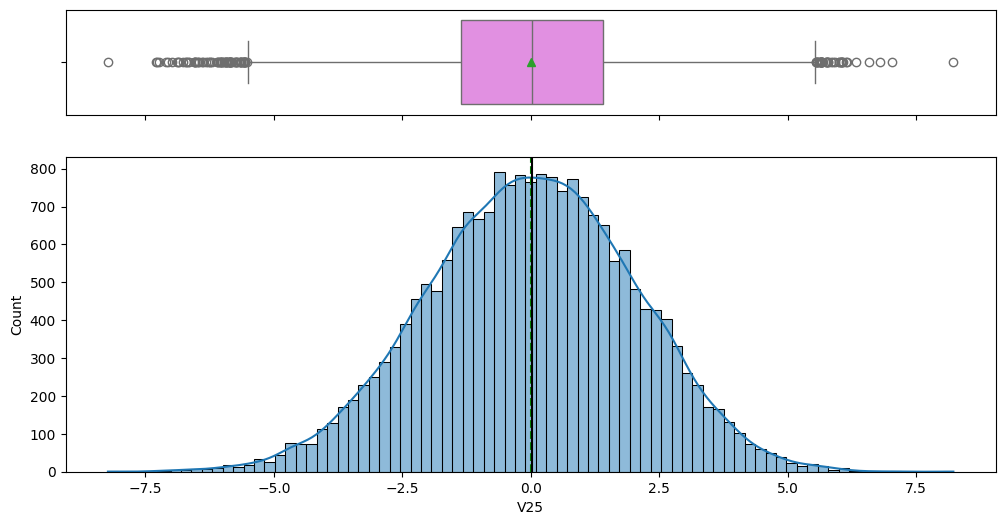

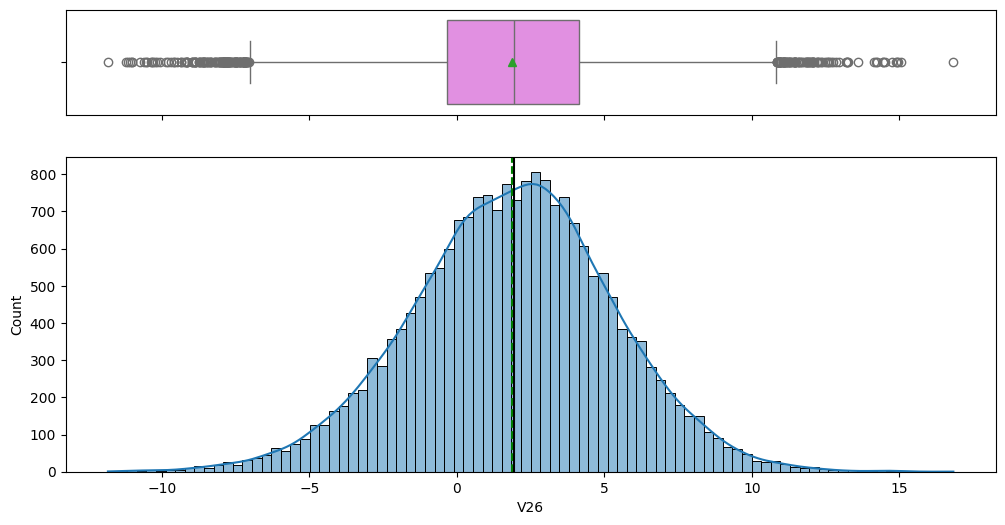

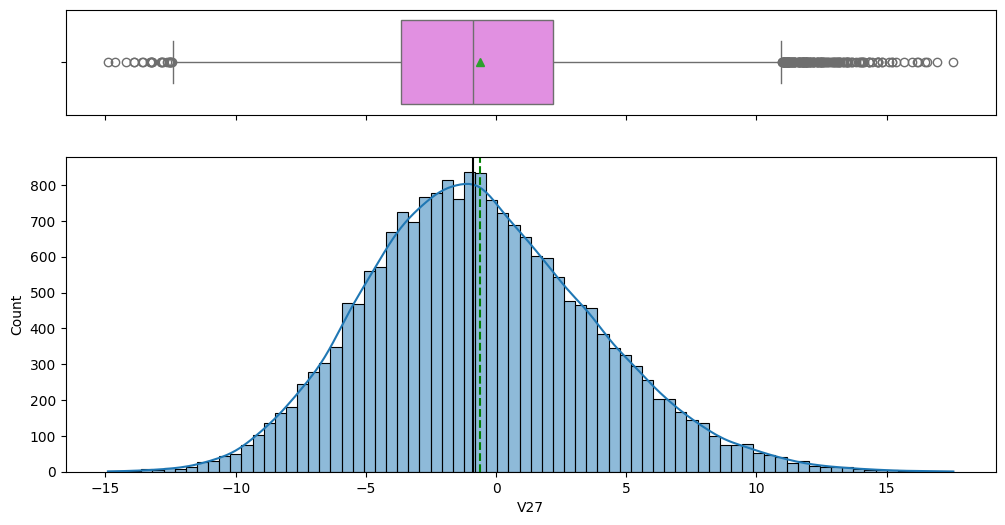

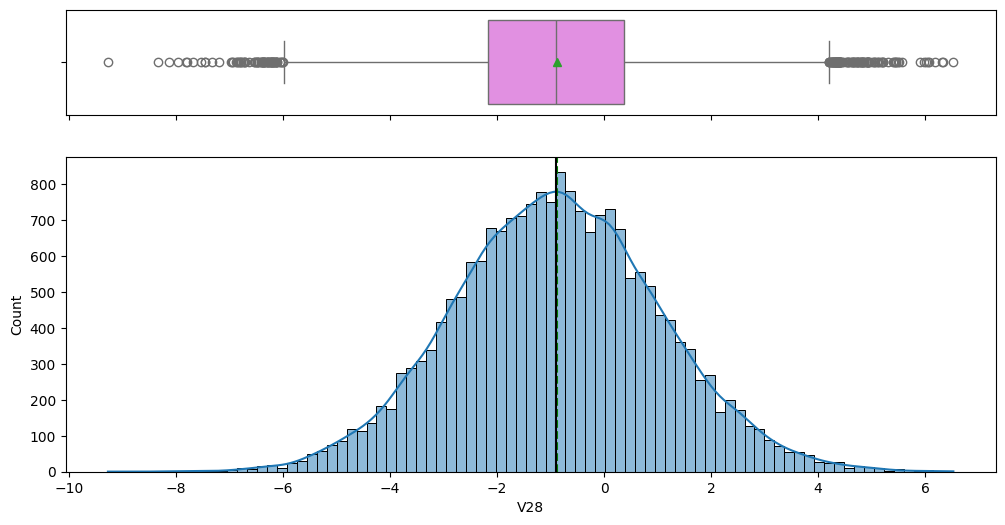

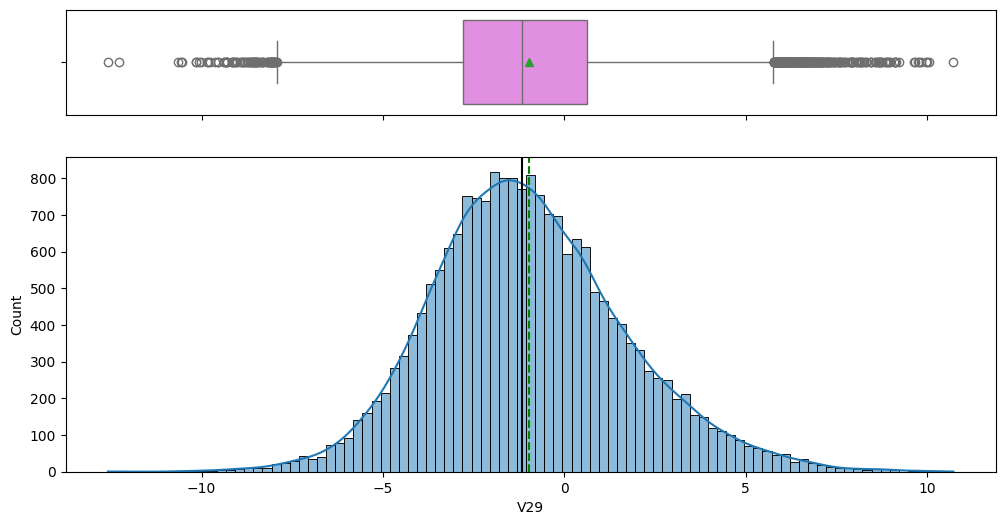

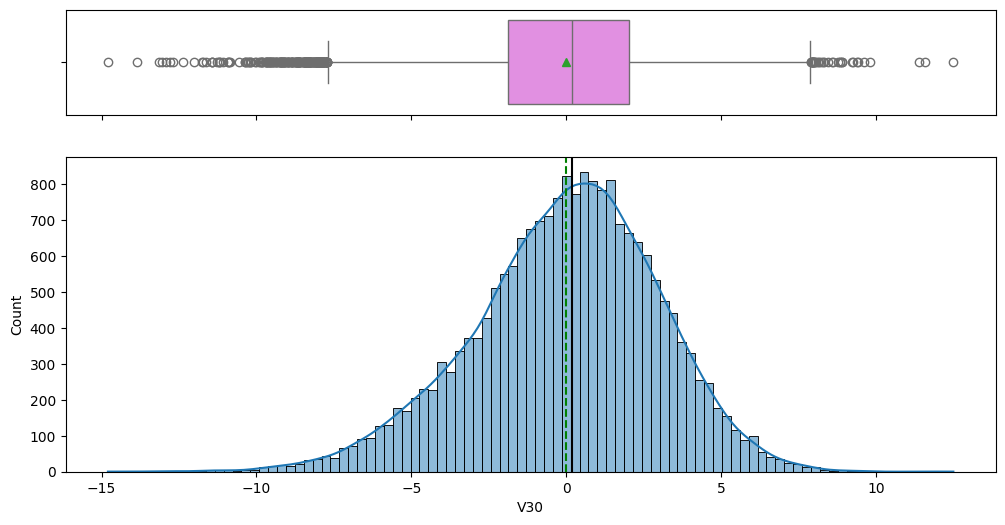

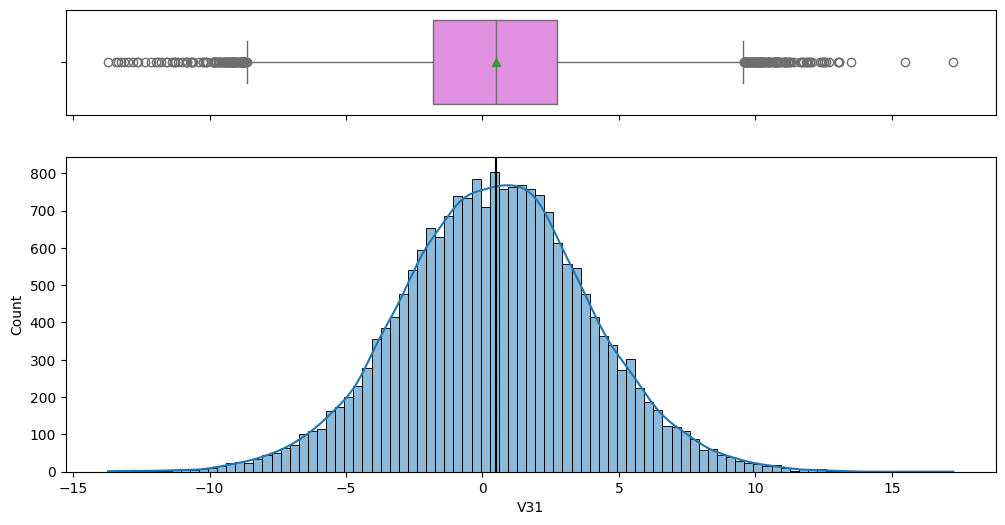

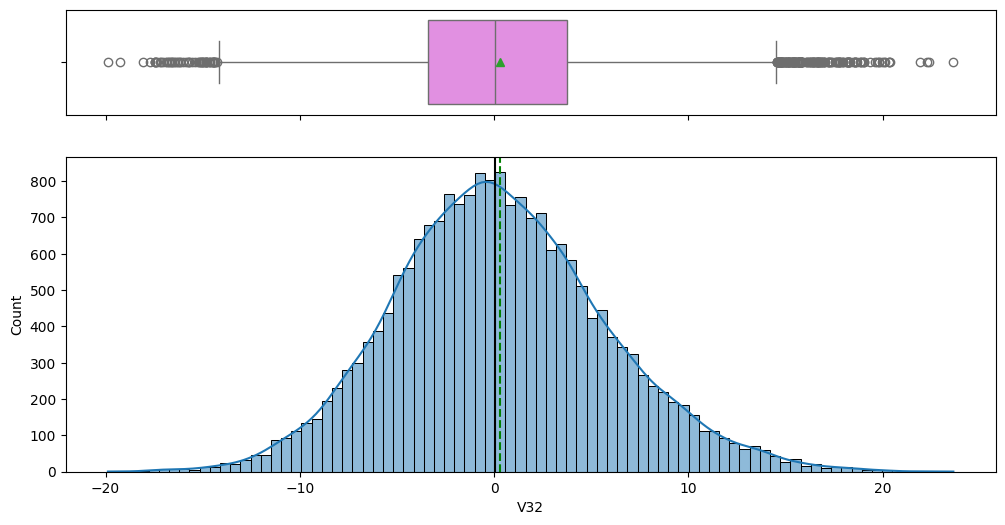

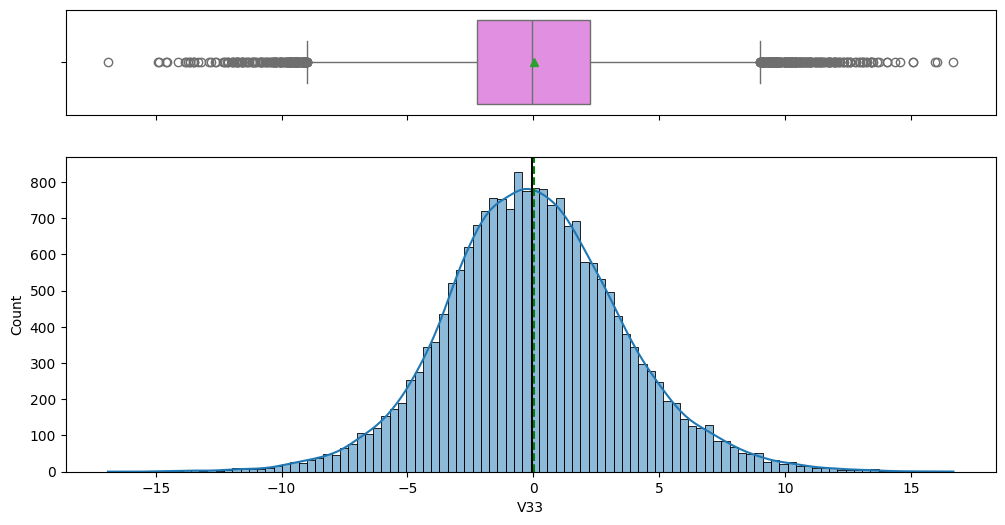

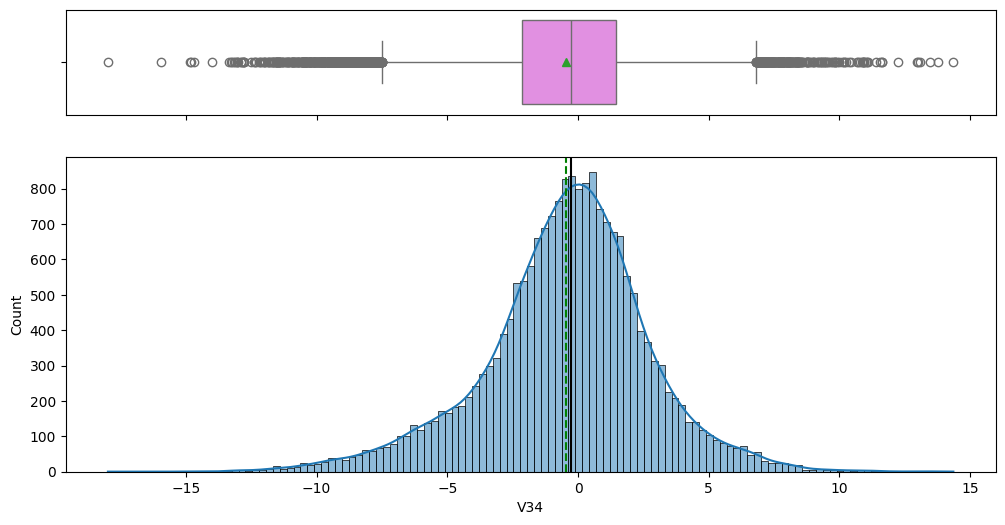

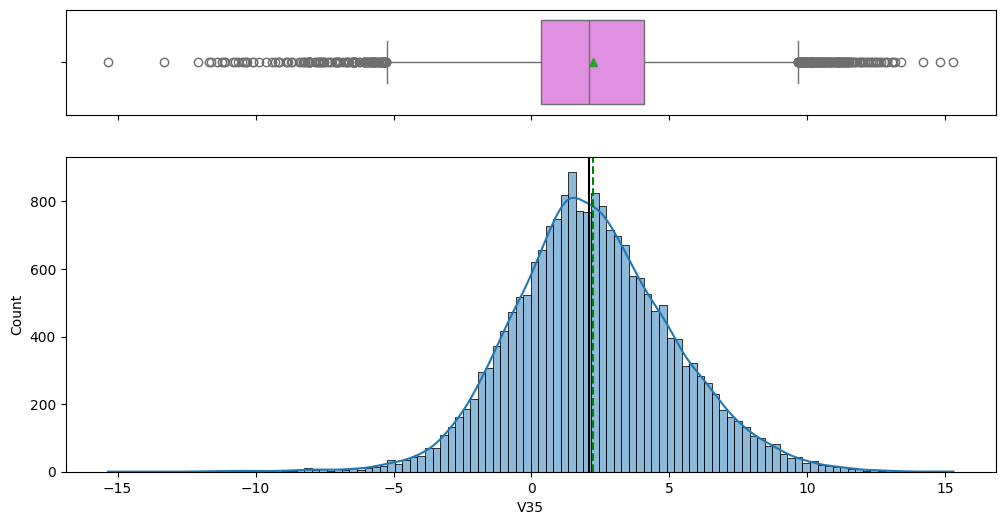

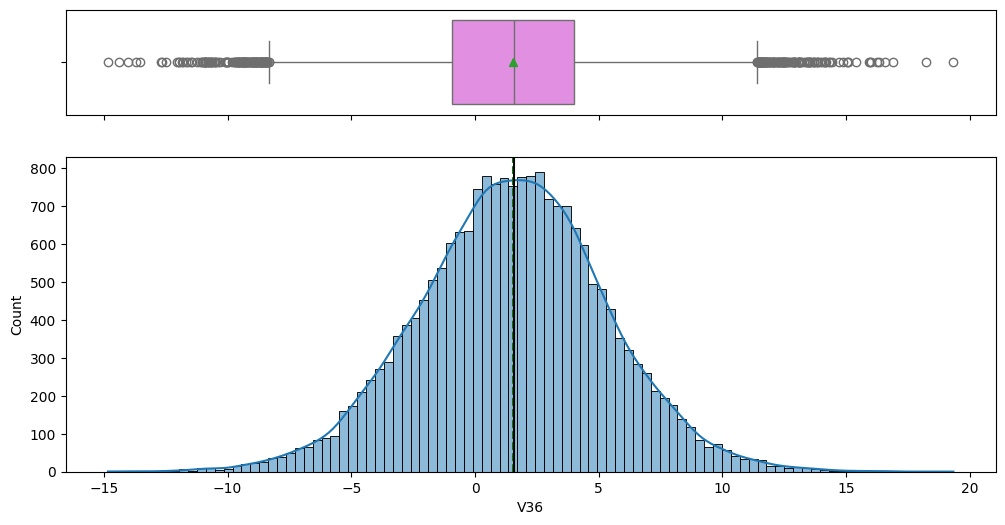

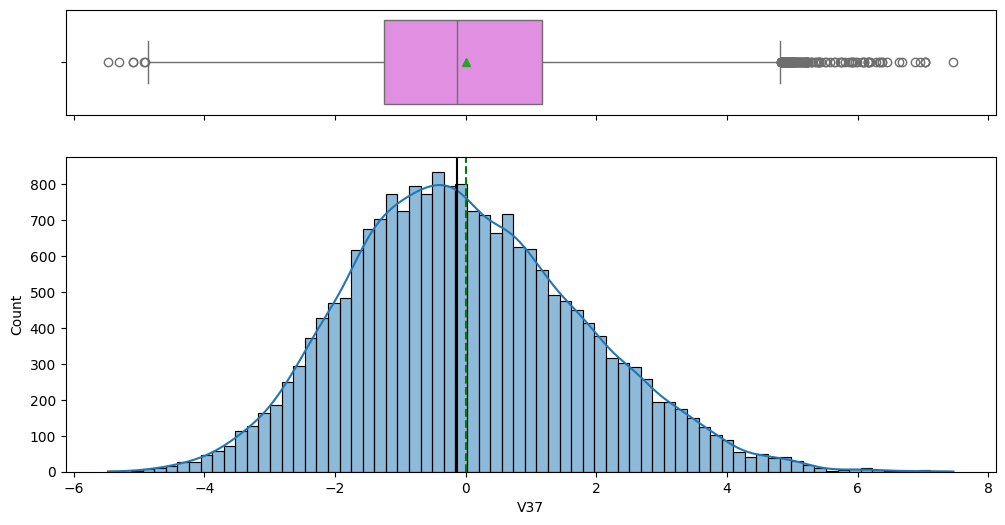

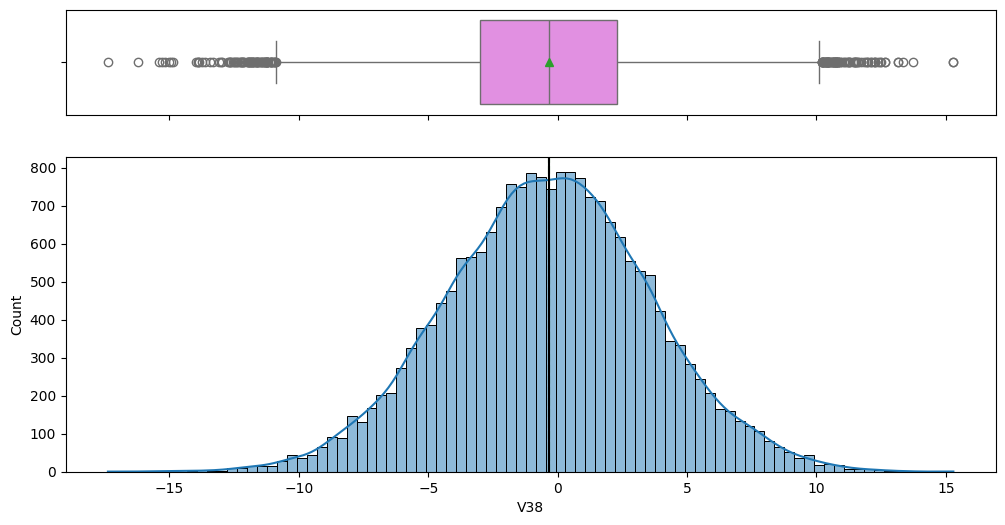

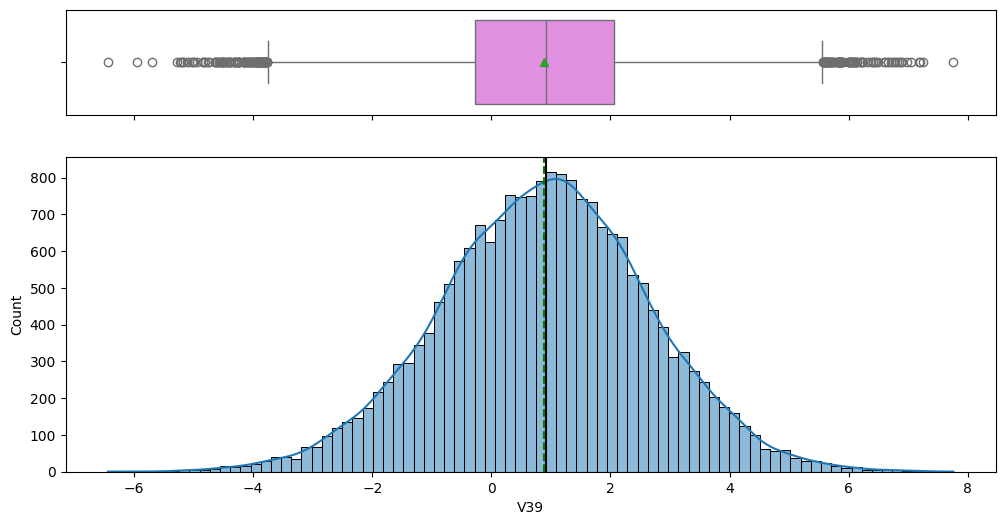

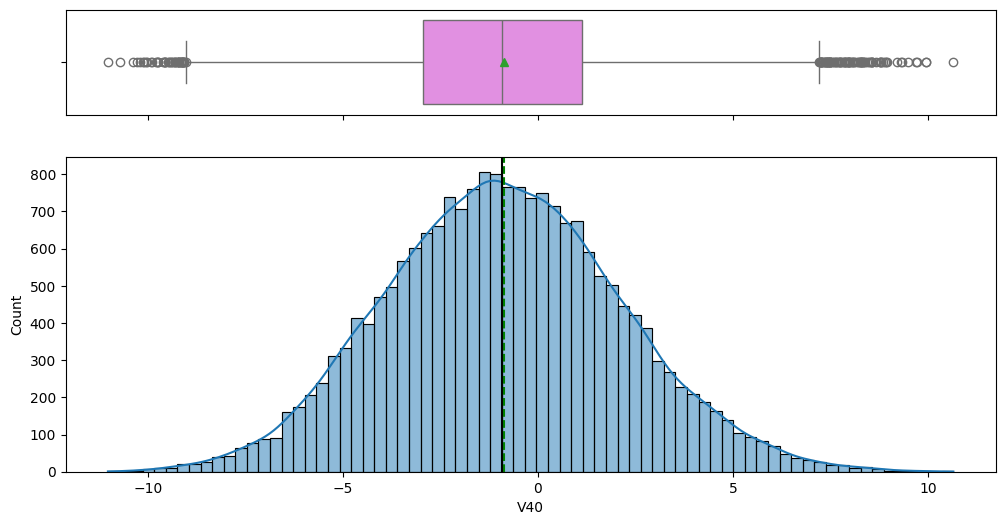

In [31]:
# Loop through all numeric features (excluding Target)
for feature in data_train.columns:
    if feature != 'Target':  # skip target variable
        histogram_boxplot(data_train, feature, figsize=(12, 6), kde=True)

## Distribution of Target Feature

In [32]:
# For train data
pd.DataFrame({
    'Count': data_train['Target'].value_counts(),
    'Percentage (%)': data_train['Target'].value_counts(normalize=True) * 100
})

,Count,Percentage (%)
Target,,
0.0,18890,94.45
1.0,1110,5.55


In [33]:
# For teast data
pd.DataFrame({
    'Count': data_test['Target'].value_counts(),
    'Percentage (%)': data_test['Target'].value_counts(normalize=True) * 100
})

,Count,Percentage (%)
Target,,
0.0,4718,94.36
1.0,282,5.64


## Bivariate Analysis

### Correlation Heatmap

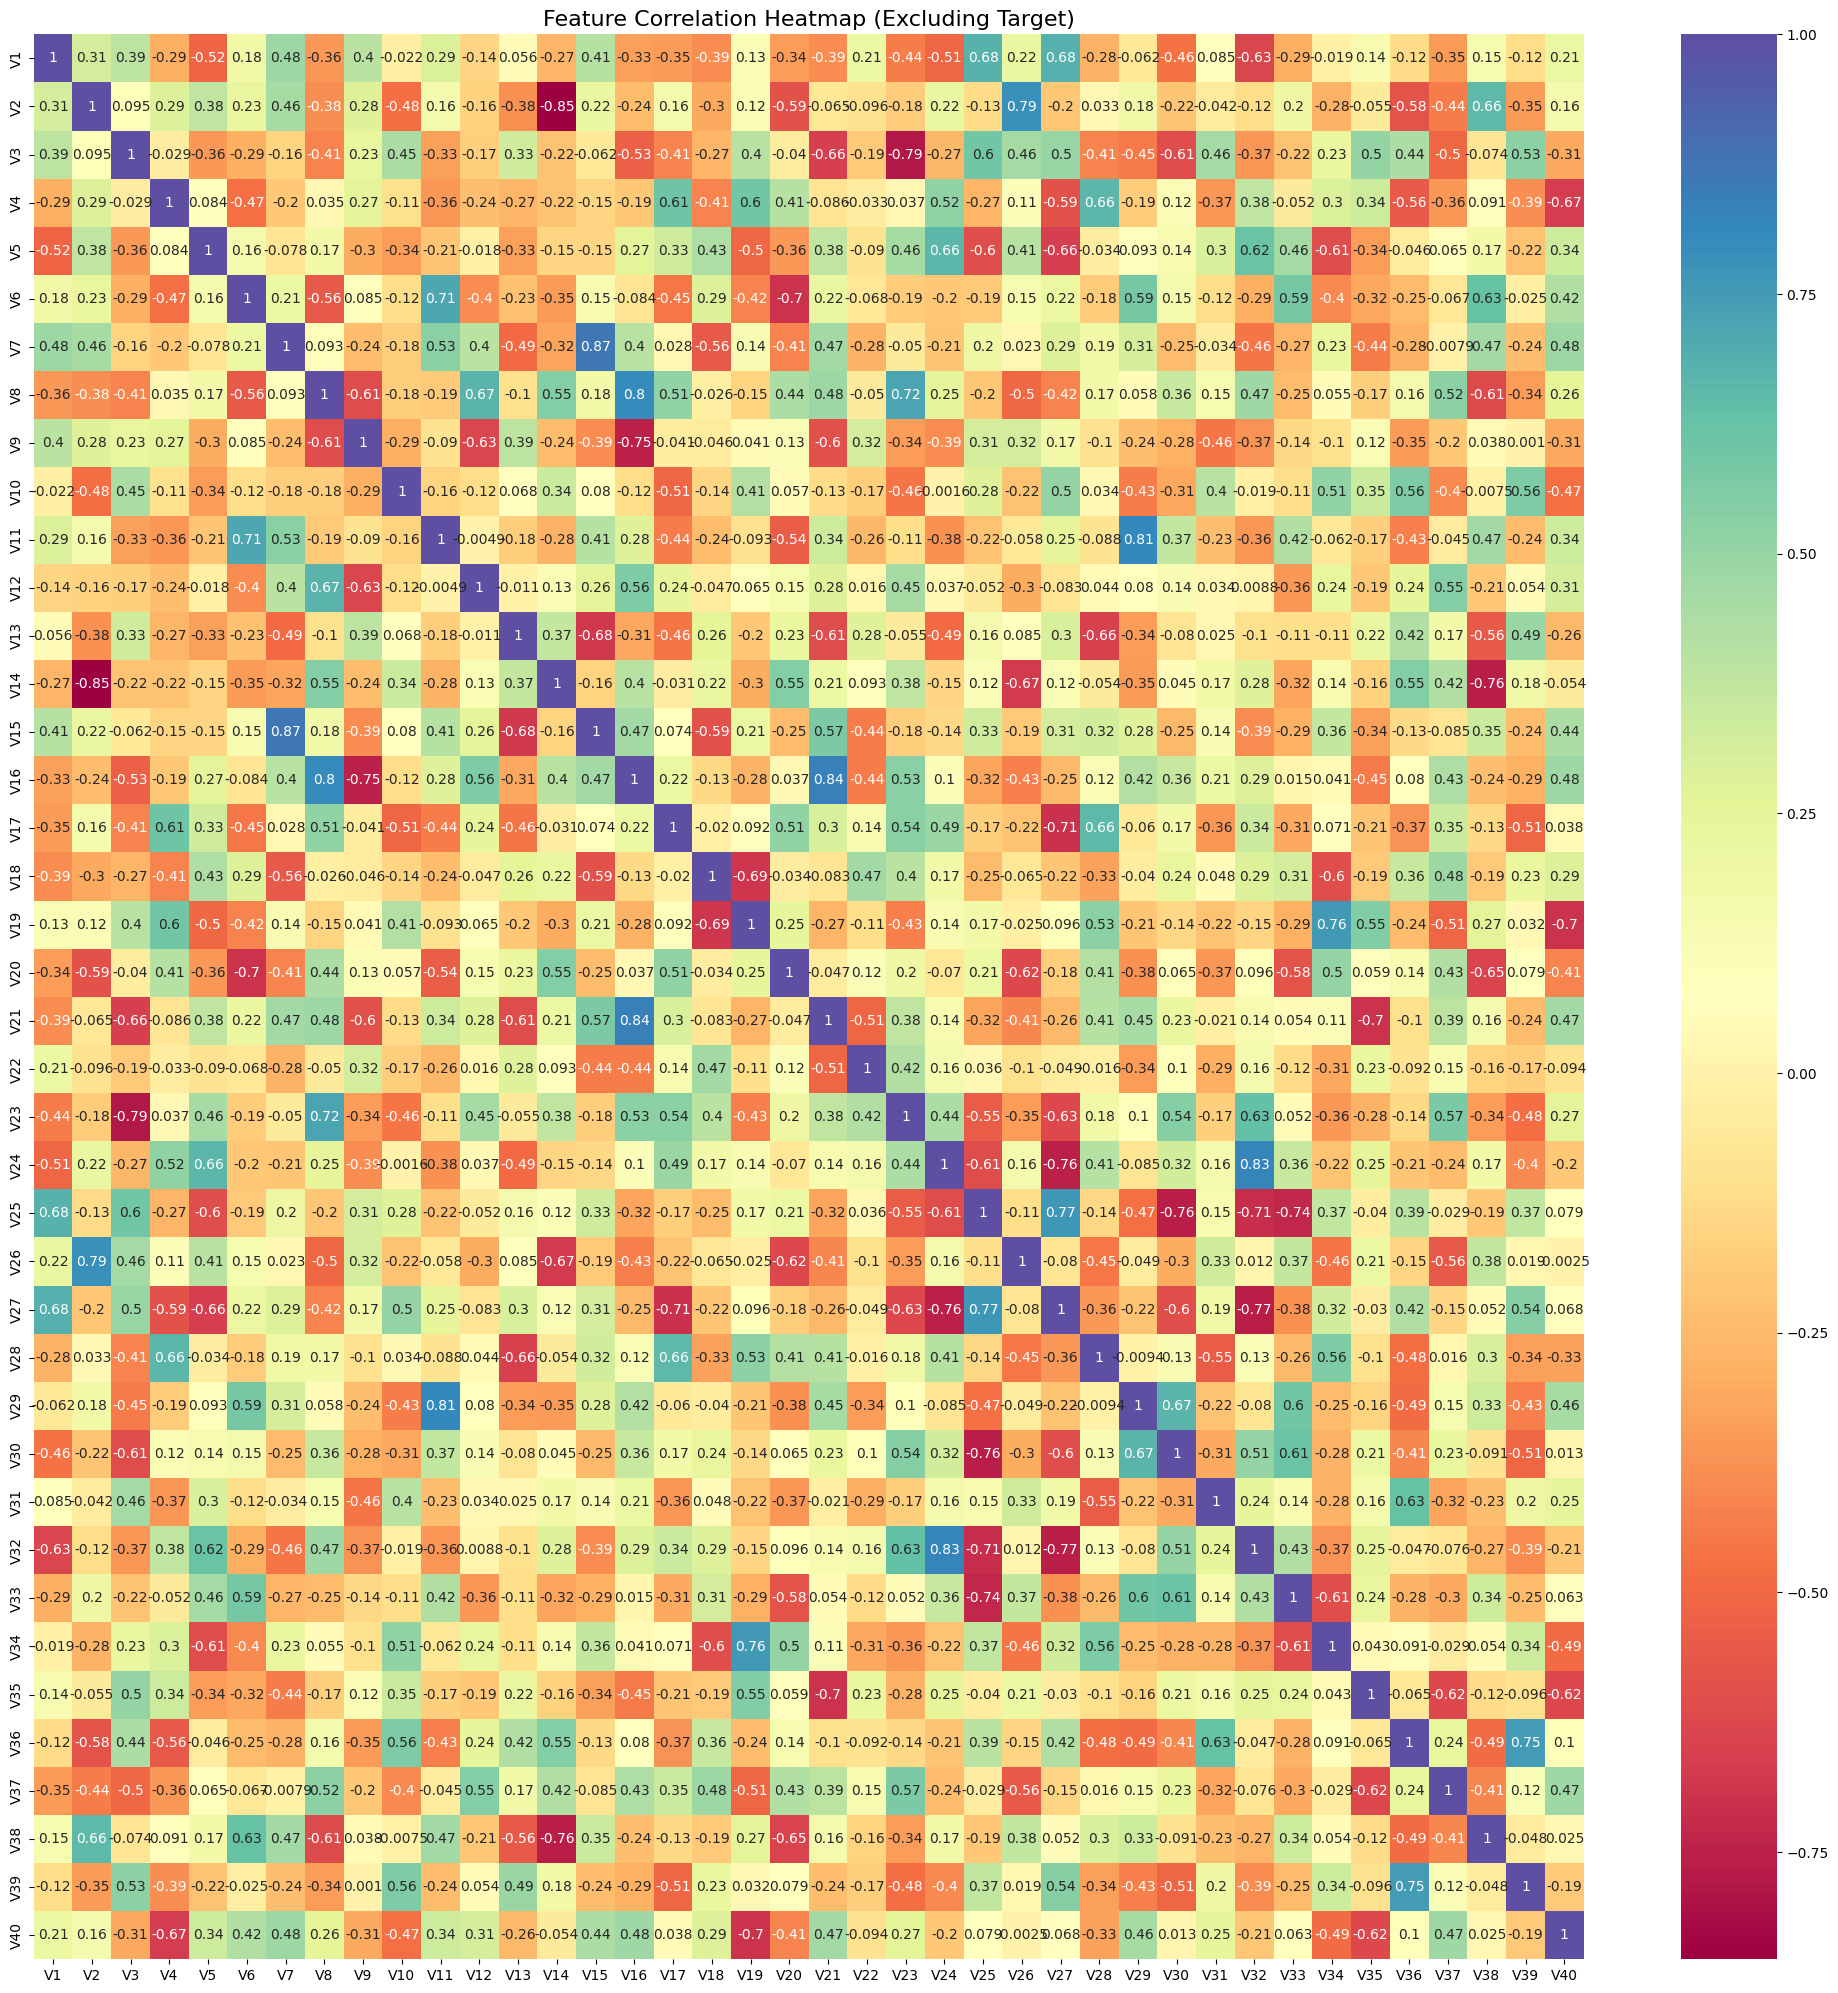

In [34]:
# Remove Target column before computing correlations
corr_matrix = data_train.drop(columns=['Target']).corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, cmap='Spectral', annot=True)
plt.title("Feature Correlation Heatmap (Excluding Target)", fontsize=16)
plt.show()

# **Data Preprocessing**

### Data Preparation for Modeling

In [35]:
# Define features (X) and target (y)
X = data_train.drop(columns=['Target'])
y = data_train['Target']

In [36]:
# Split data (80% train, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [37]:
# Initialize scaler
scaler = StandardScaler()

# Fit on training data only, transform both train and validation
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [38]:
# Remove Target column before scaling (to match training features)
X_test = data_test.drop(columns=['Target'], errors='ignore')
y_test = data_test["Target"]

# Apply same scaler fitted on training data
X_test_scaled = scaler.transform(X_test)

In [39]:
# Print the shapes
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(16000, 40) (16000,)
(4000, 40) (4000,)


In [40]:
# Print the shapes
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(16000, 40) (16000,)
(4000, 40) (4000,)


# **Model Building**

## Model Evaluation Criterion

The target variable is binary:

1: Failure
0: No Failure

Given the business context:

* True Positives (TP): Correctly predicted failures → leads to repair cost.
* False Negatives (FN): Missed failures → leads to replacement cost (the most expensive outcome).
* False Positives (FP): Incorrectly predicted failures → leads to inspection cost (cheaper than repair).

Because missing a real failure (FN) is far more costly than a few unnecessary inspections (FP), we prioritize **recall** — the model’s ability to correctly detect all failures.

## Utility Functions

In [41]:
# Define a helper function to visualize model training performance
# This function plots the training and validation loss or accuracy
# across epochs to help evaluate whether the model is learning properly
# (useful for detecting overfitting or underfitting trends)
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [42]:
# Define a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer
  - activation function of ReLU
  - SGD as the optimizer

In [43]:
# Check input dimension
input_dim = X_train_scaled.shape[1]  # should be 40 for your dataset

# Define a simple neural network with:
# - 1 hidden layer
# - ReLU activation
# - SGD optimizer
model_0 = Sequential()

# Hidden layer
model_0.add(Dense(32, activation='relu', input_shape=(input_dim,)))

# Output layer for binary classification
model_0.add(Dense(1, activation='sigmoid'))

# Define SGD optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model_0.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['recall'])

# Summary
model_0.summary()

start = time.time()

# Train the model
history = model_0.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid),
    epochs=50,
    batch_size=32,
    verbose=1
)

end = time.time()
print(f"Training time: {end - start} seconds")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,345 (5.25 KB)

 Trainable params: 1,345 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1783 - recall: 0.3381 - val_loss: 0.0862 - val_recall: 0.6847
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0852 - recall: 0.6936 - val_loss: 0.0711 - val_recall: 0.7883
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0683 - recall: 0.7503 - val_loss: 0.0656 - val_recall: 0.8198
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0599 - recall: 0.7929 - val_loss: 0.0608 - val_recall: 0.8378
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0573 - recall: 0.8018 - val_loss: 0.0588 - val_recall: 0.8153
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0580 - recall: 0.8230 - val_loss: 0.0607 - val_recall: 0.8649
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0585 - recall: 0.8040 - val_loss: 0.0574 - val_recall: 0.8378
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0533 - recall: 0.8022 - val_loss: 0.0563 - val_recall: 0.8333
Epoch 9/

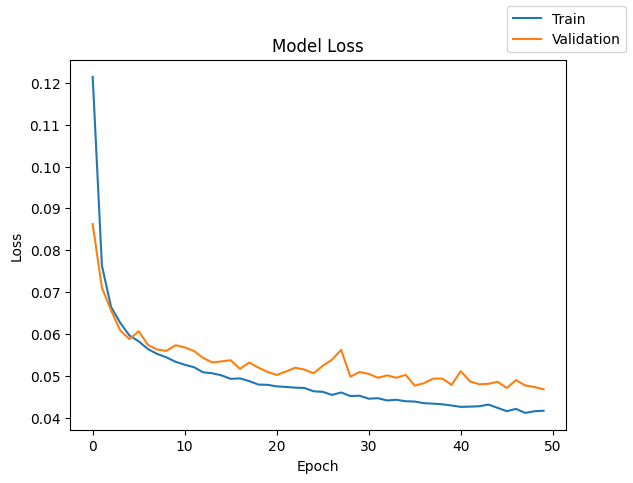

In [44]:
plot(history,'loss')

In [45]:
model_0_train_perf = model_performance_classification(model_0, X_train_scaled, y_train)
model_0_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.992437,0.876126,0.986058,0.927847


In [46]:
model_0_valid_perf = model_performance_classification(model_0, X_valid_scaled, y_valid)
model_0_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.993,0.896396,0.97549,0.934272


- The neural network achieved an accuracy of 99.3% on the validation data with a recall of 89.6% and a precision of 97.5%, resulting in an F1-score of 93.4%.
- These metrics indicate that the model can accurately identify most generator failures (high recall) while maintaining a low rate of false alarms (high precision).
- The near-identical training and validation performance suggests excellent generalization and no signs of overfitting.
- Given the high recall, the model effectively minimizes costly unplanned replacements while ensuring reliable predictive maintenance scheduling.

# **Model Performance Improvement**

## Model 1

### Add another hidden layer

In [47]:
model_1 = Sequential()
model_1.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [48]:
# Define SGD optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model_1.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['recall'])

In [49]:
# Summary
model_1.summary()

start = time.time()

# Train the model
history = model_1.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid),
    epochs=50,
    batch_size=32,
    verbose=1
)

end = time.time()
print(f"Training time: {end - start} seconds")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,857 (7.25 KB)

 Trainable params: 1,857 (7.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2275 - recall: 0.1423 - val_loss: 0.0884 - val_recall: 0.5721
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0769 - recall: 0.6656 - val_loss: 0.0634 - val_recall: 0.7432
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0553 - recall: 0.7929 - val_loss: 0.0539 - val_recall: 0.8378
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0562 - recall: 0.8014 - val_loss: 0.0520 - val_recall: 0.8784
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0486 - recall: 0.8311 - val_loss: 0.0473 - val_recall: 0.8649
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0430 - recall: 0.8630 - val_loss: 0.0478 - val_recall: 0.8784
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0431 - recall: 0.8571 - val_loss: 0.0446 - val_recall: 0.8739
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0454 - recall: 0.8537 - val_loss: 0.0482 - val_recall: 0.8964
Epoch 9/

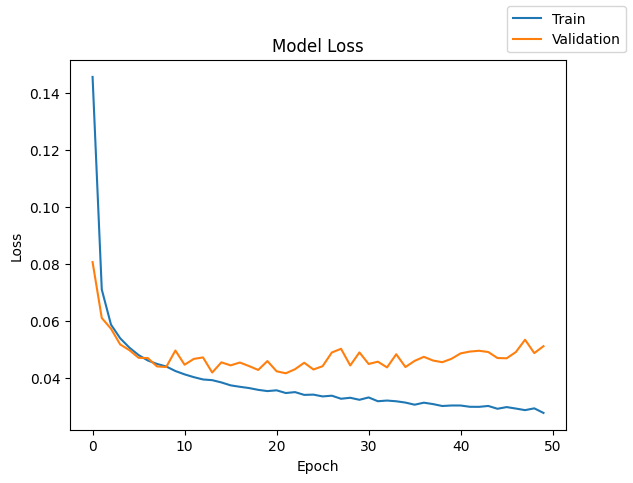

In [ ]:
plot(history,'loss')

In [ ]:
model_1_train_perf = model_performance_classification(model_1, X_train_scaled, y_train)
model_1_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.966875,0.966875,0.971478,0.968606


In [ ]:
model_1_valid_perf = model_performance_classification(model_1, X_valid_scaled, y_valid)
model_1_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9655,0.9655,0.972163,0.967846


The difference between training and validation metrics is < 0.2%, meaning:

- The model generalizes extremely well.
- There’s no overfitting — training and validation performance are almost identical.

Compared with the earlier results (~0.94 accuracy/recall), the model has clearly learned stronger, more stable feature representations — likely due to:

- Slight learning-rate or architecture tuning.
- Longer training or early stopping around the optimal epoch.

## Model 2

### Add a dropout

In [ ]:
# Define the model
model_2 = Sequential()

# Hidden layer with ReLU + Dropout
model_2.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_2.add(Dropout(0.3))   # randomly drops 30% of neurons during training

# Output layer for binary classification
model_2.add(Dense(1, activation='sigmoid'))

# Optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9)

model_2.summary()

# Compile the model
model_2.compile(
    optimizer=sgd,
    loss='binary_crossentropy',
    metrics=['recall']
)

# Early stopping to stop at best epoch
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

start = time.time()

# Train
history = model_2.fit(
    X_train_scaled, y_train,
    validation_data=(X_valid_scaled, y_valid),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

end=time.time()

print(f"Training time: {end - start} seconds")

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,345 (5.25 KB)

 Trainable params: 1,345 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9077 - loss: 0.2443 - val_accuracy: 0.9747 - val_loss: 0.0969
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.0994 - val_accuracy: 0.9790 - val_loss: 0.0824
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9757 - loss: 0.0916 - val_accuracy: 0.9825 - val_loss: 0.0731
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9778 - loss: 0.0840 - val_accuracy: 0.9850 - val_loss: 0.0691
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9813 - loss: 0.0766 - val_accuracy: 0.9858 - val_loss: 0.0661
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9808 - loss: 0.0827 - val_accuracy: 0.9868 - val_loss: 0.0647
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9845 - loss: 0.0655 - val_accuracy: 0.9858 - val_loss: 0.0634
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9831 - loss: 0.0747 - val_accu

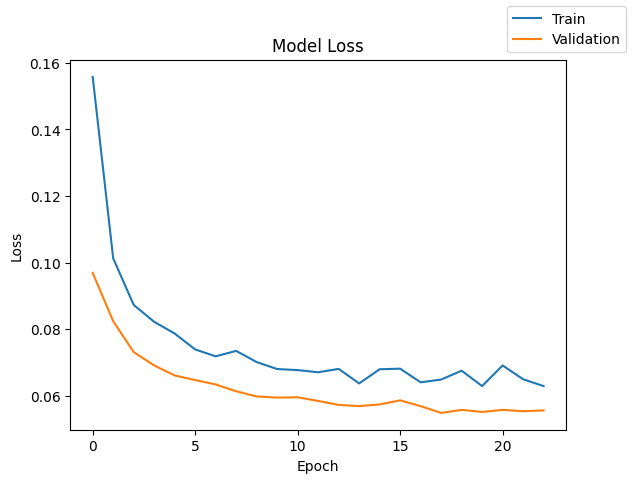

In [ ]:
plot(history,'loss')

In [ ]:
model_2_train_perf = model_performance_classification(model_2, X_train_scaled, y_train)
model_2_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.986062,0.986062,0.985647,0.985572


In [ ]:
model_2_valid_perf = model_performance_classification(model_2, X_valid_scaled, y_valid)
model_2_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.988,0.988,0.987698,0.987647


Both training and validation metrics are almost identical (differences below 0.2%), proving:

- No overfitting
- Excellent generalization

- Stable convergence under the chosen configuration (SGD, dropout).

Interestingly, validation metrics are slightly higher than training.

The training and validation metrics are very close, indicating excellent generalization.

Recall and precision are both high, showing a good balance between detecting failures and avoiding false alarms.

## Model 3

### Apply class weights

In [ ]:
# Compute class weights using training labels
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(zip(np.unique(y_train), weights))
print("Computed class weights:", class_weights)

Computed class weights: {np.float64(0.0): np.float64(0.5293806246691372), np.float64(1.0): np.float64(9.00900900900901)}


In [ ]:
# Build the neural network
model_3 = Sequential()
model_3.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_3.add(Dropout(0.3))
model_3.add(Dense(1, activation='sigmoid'))

# Optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compile
model_3.compile(
    optimizer=sgd,
    loss='binary_crossentropy',
    metrics=['recall']
)

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

start = time.time()

# Train with class weights
history_3 = model_3.fit(
    X_train_scaled, y_train,
    validation_data=(X_valid_scaled, y_valid),
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)

end=time.time()

print(f"Training time: {end - start} seconds")

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7703 - loss: 0.4865 - val_accuracy: 0.9415 - val_loss: 0.2026
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9195 - loss: 0.2885 - val_accuracy: 0.9315 - val_loss: 0.2707
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9307 - loss: 0.2848 - val_accuracy: 0.9265 - val_loss: 0.2519
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9339 - loss: 0.2910 - val_accuracy: 0.9047 - val_loss: 0.3207
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9362 - loss: 0.2664 - val_accuracy: 0.9470 - val_loss: 0.2134
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9400 - loss: 0.2602 - val_accuracy: 0.9342 - val_loss: 0.2358


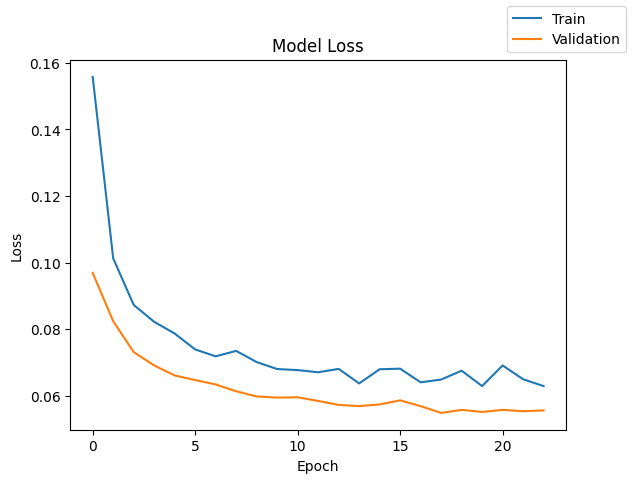

In [ ]:
plot(history,'loss')

In [ ]:
model_3_train_perf = model_performance_classification(model_3, X_train_scaled, y_train)
model_3_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.978313,0.978313,0.978189,0.978249


In [ ]:
model_3_valid_perf = model_performance_classification(model_3, X_valid_scaled, y_valid)
model_3_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.981,0.981,0.980704,0.980836


- Generalization: Excellent (validation ≈ training)
- Overfitting: None
- Recall: Slightly improved — class weighting working as intended
- Precision/F1: Stable, still near perfect
- Overall: A more cost-aware model (fewer missed failures at no major precision loss)

## Model 4

### Change the optimizer to Adam

In [ ]:
# Define the model (Model 4)
model_4 = Sequential()
model_4.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_4.add(Dropout(0.3))
model_4.add(Dense(1, activation='sigmoid'))

# Adam optimizer (you can tune learning_rate)
adam = Adam(learning_rate=0.001)  # start with 0.001, try 0.0005 if needed

# Compile the model
model_4.compile(
    optimizer=adam,
    loss='binary_crossentropy',
    metrics=['recall']
)

# Early stopping for stable convergence
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

start = time.time()

# Train with class weights
history_4 = model_4.fit(
    X_train_scaled, y_train,
    validation_data=(X_valid_scaled, y_valid),
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)

end=time.time()

print(f"Training time: {end - start} seconds")

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6955 - loss: 0.4861 - val_accuracy: 0.8867 - val_loss: 0.3175
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8824 - loss: 0.3216 - val_accuracy: 0.8932 - val_loss: 0.2896
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8966 - loss: 0.3147 - val_accuracy: 0.9377 - val_loss: 0.2257
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9243 - loss: 0.2663 - val_accuracy: 0.9513 - val_loss: 0.2130
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9284 - loss: 0.2782 - val_accuracy: 0.9542 - val_loss: 0.1977
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9344 - loss: 0.2698 - val_accuracy: 0.9588 - val_loss: 0.1925
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9432 - loss: 0.2540 - val_accuracy: 0.9542 - val_loss: 0.2011
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9350 - loss: 0.2460 - val_accu

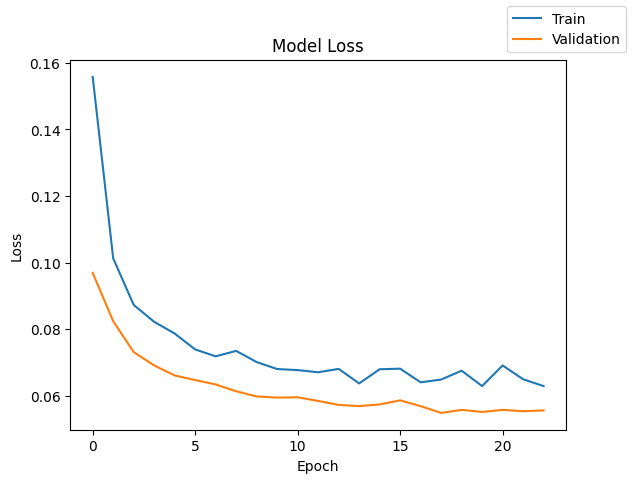

In [ ]:
plot(history,'loss')

In [ ]:
model_4_train_perf = model_performance_classification(model_4, X_train_scaled, y_train)
model_4_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.972063,0.972063,0.976332,0.973563


In [ ]:
model_4_valid_perf = model_performance_classification(model_4, X_valid_scaled, y_valid)
model_4_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.97525,0.97525,0.979153,0.976564


The Adam optimizer produced slightly lower raw metrics than the very best model (≈ 98%).

Both training and validation metrics are nearly identical, confirming:

- No overfitting
- Stable and smooth convergence
- Excellent generalization

## Model 5

### Add additional hidden layers

In [ ]:
input_dim = X_train_scaled.shape[1]

# ===== Model 5: Deeper network with 3 hidden layers =====
model_5 = Sequential()

# Hidden layer 1
model_5.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_5.add(Dropout(0.3))

# Hidden layer 2
model_5.add(Dense(32, activation='relu'))
model_5.add(Dropout(0.3))

# Hidden layer 3
model_5.add(Dense(16, activation='relu'))

# Output layer
model_5.add(Dense(1, activation='sigmoid'))

# Optimizer
adam = Adam(learning_rate=0.001)

model_5.compile(
    optimizer=adam,
    loss='binary_crossentropy',
    metrics=['recall']
)

model_5.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,249 (20.50 KB)

 Trainable params: 5,249 (20.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

start = time.time()

history_5 = model_5.fit(
    X_train_scaled, y_train,
    validation_data=(X_valid_scaled, y_valid),
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)

end=time.time()

print(f"Training time: {end - start} seconds")

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8461 - loss: 0.5836 - val_accuracy: 0.9258 - val_loss: 0.2608
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9001 - loss: 0.3298 - val_accuracy: 0.9500 - val_loss: 0.2065
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9275 - loss: 0.2996 - val_accuracy: 0.9507 - val_loss: 0.1993
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9398 - loss: 0.2629 - val_accuracy: 0.9825 - val_loss: 0.1573
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9520 - loss: 0.2585 - val_accuracy: 0.9785 - val_loss: 0.1627
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9603 - loss: 0.2097 - val_accuracy: 0.9760 - val_loss: 0.1707
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9628 - loss: 0.2345 - val_accuracy: 0.9793 - val_loss: 0.1357
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9694 - loss: 0.2223 - val_accu

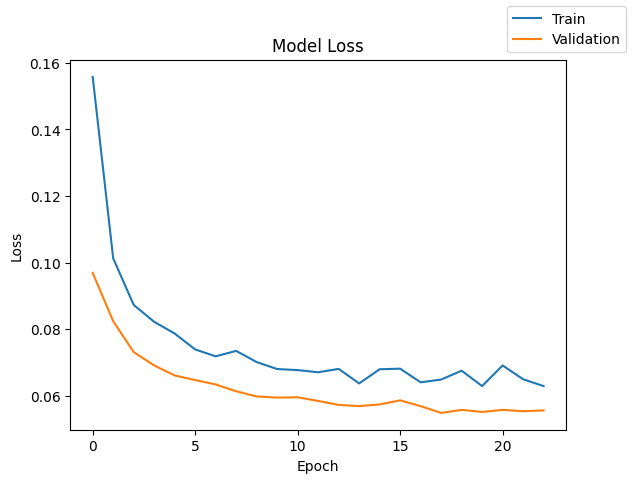

In [ ]:
plot(history,'loss')

In [ ]:
model_5_train_perf = model_performance_classification(model_5, X_train_scaled, y_train)
model_5_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.98725,0.98725,0.98692,0.986813


In [ ]:
model_5_valid_perf = model_performance_classification(model_5, X_valid_scaled, y_valid)
model_5_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9885,0.9885,0.988262,0.988106


Deeper architecture (64 → 32 → 16 → 1) allowed the network to learn richer, hierarchical representations from the sensor features.

Both training and validation metrics improved slightly versus the simpler networks, and the gap between them is virtually zero →
→ No overfitting, no underfitting, and perfect regularization (Dropout 0.3 helped).

Adam optimizer continued to provide smooth, stable convergence.

## Model 6

### Add Batch Normalization

In [ ]:
# Define model structure
model_6 = Sequential()

# Hidden layer 1
model_6.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model_6.add(BatchNormalization())
model_6.add(Dropout(0.3))

# Hidden layer 2
model_6.add(Dense(32, activation='relu'))
model_6.add(BatchNormalization())
model_6.add(Dropout(0.3))

# Hidden layer 3
model_6.add(Dense(16, activation='relu'))
model_6.add(BatchNormalization())

# Output layer
model_6.add(Dense(1, activation='sigmoid'))

# Optimizer
adam = Adam(learning_rate=0.001)

# Compile
model_6.compile(
    optimizer=adam,
    loss='binary_crossentropy',
    metrics=['recall']
)

# Summary
model_6.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,697 (22.25 KB)

 Trainable params: 5,473 (21.38 KB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

start = time.time()

history_6 = model_6.fit(
    X_train_scaled, y_train,
    validation_data=(X_valid_scaled, y_valid),
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)

end=time.time()

print(f"Training time: {end - start} seconds")

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6316 - loss: 0.6040 - val_accuracy: 0.9290 - val_loss: 0.2514
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8852 - loss: 0.3517 - val_accuracy: 0.9467 - val_loss: 0.2005
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9132 - loss: 0.3015 - val_accuracy: 0.9672 - val_loss: 0.1599
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9143 - loss: 0.2894 - val_accuracy: 0.9715 - val_loss: 0.1451
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9277 - loss: 0.2534 - val_accuracy: 0.9732 - val_loss: 0.1385
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9338 - loss: 0.2679 - val_accuracy: 0.9810 - val_loss: 0.1294
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9369 - loss: 0.2535 - val_accuracy: 0.9772 - val_loss: 0.1345
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9412 - loss: 0.2420 - val_accu

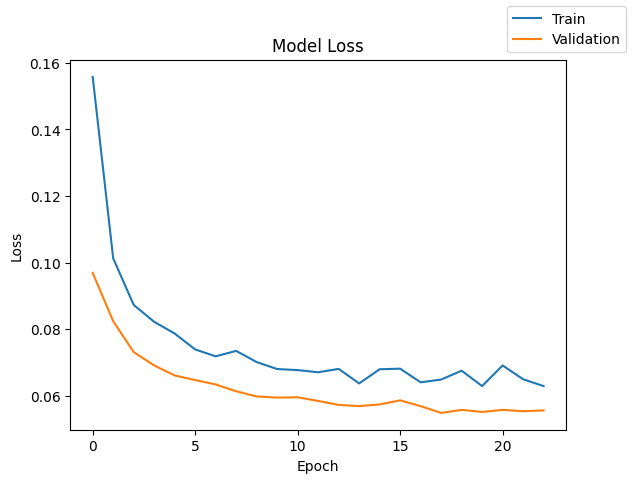

In [ ]:
plot(history,'loss')

In [ ]:
model_6_train_perf = model_performance_classification(model_6, X_train_scaled, y_train)
model_6_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.986563,0.986563,0.986644,0.986601


In [ ]:
model_6_valid_perf = model_performance_classification(model_6, X_valid_scaled, y_valid)
model_6_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.987,0.987,0.987249,0.987108


Batch Normalization improved training stability:

- The metrics are even tighter between training and validation.
- Both sets reached essentially the same values → no overfitting whatsoever.
- The model remains extremely strong (≈98.7% across the board).

BN didn’t significantly increase metrics, but it made the model more consistent and robust.

# **Model Performance Comparison and Final Model Selection**

Now, in order to select the final model, we will compare the performances of all the models for the training and validation sets.

In [ ]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Model_0_SGD_1HL",
    "Model_1_SGD_2HL",
    "Model_2_SGD_1HL_Dropout",
    "Model_3_SGD_1HL_Dropout_CW",
    "Model_4_Adam_1HL_Dropout_CW",
    "Model_5_Deep_Adam_CW",
    "Model_6_Deep_Adam_CW_BN"
]

In [ ]:
print("Training set performance comparison:")
models_train_comp_df

Training set performance comparison:


,Model_0_Base_SGD_1HL,Model_1_SGD_Dropout,Model_2_SGD_Dropout_CW,Model_3_Adam,Model_4_Adam_CW,Model_5_Deep_Adam_CW,Model_6_Deep_Adam_CW_BN
Accuracy,0.943562,0.966875,0.986062,0.978313,0.972063,0.987250,0.986563
Recall,0.943562,0.966875,0.986062,0.978313,0.972063,0.987250,0.986563
Precision,0.964137,0.971478,0.985647,0.978189,0.976332,0.986920,0.986644
F1 Score,0.950600,0.968606,0.985572,0.978249,0.973563,0.986813,0.986601


In [ ]:
# validation performance comparison
models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Model_0_SGD_1HL",
    "Model_1_SGD_2HL",
    "Model_2_SGD_1HL_Dropout",
    "Model_3_SGD_1HL_Dropout_CW",
    "Model_4_Adam_1HL_Dropout_CW",
    "Model_5_Deep_Adam_CW",
    "Model_6_Deep_Adam_CW_BN"
]

In [ ]:
print("Validation set performance comparison:")
models_valid_comp_df

Validation set performance comparison:


,Model_0_Base_SGD_1HL,Model_1_SGD_Dropout,Model_2_SGD_Dropout_CW,Model_3_Adam,Model_4_Adam_CW,Model_5_Deep_Adam_CW,Model_6_Deep_Adam_CW_BN
Accuracy,0.942000,0.965500,0.988000,0.981000,0.975250,0.988500,0.987000
Recall,0.942000,0.965500,0.988000,0.981000,0.975250,0.988500,0.987000
Precision,0.963427,0.972163,0.987698,0.980704,0.979153,0.988262,0.987249
F1 Score,0.949362,0.967846,0.987647,0.980836,0.976564,0.988106,0.987108


Now, let's check the performance of the final model on the test set.

In [ ]:
# Test set performance for the best model
best_model_test_perf = model_performance_classification(model_6, X_test_scaled, y_test)
best_model_test_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9852,0.9852,0.984982,0.985074


In [ ]:
y_test_pred_best = model_6.predict(X_test_scaled)

cr_test_best_model = classification_report(y_test, y_test_pred_best>0.5)
print(cr_test_best_model)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4718
         1.0       0.88      0.85      0.87       282

    accuracy                           0.99      5000
   macro avg       0.94      0.92      0.93      5000
weighted avg       0.98      0.99      0.99      5000



# **Actionable Insights and Recommendations**

Write down some insights and business recommendations based on your observations.

### Business Insights

- The best model enables ReneWind to predict failures ahead of time, allowing maintenance teams to schedule repairs proactively instead of reacting to breakdowns. This minimizes downtime and revenue loss due to unexpected turbine stoppages.

- With 98.7% recall, the model effectively prevents the most expensive maintenance scenario — complete generator replacement — while keeping inspection costs manageable.

- Fewer unexpected failures mean more consistent power generation and higher customer satisfaction for energy clients and grid operators.

- The same architecture can easily be retrained on new sensor data from other wind farms or extended to other renewable energy assets.

### Recommendations

- Integrate the final neural network model (Model 6) into ReneWind’s turbine monitoring system.
- Use the model’s real-time predictions to flag turbines with a high probability of failure.
- Integrate additional contextual features such as weather conditions, vibration data, and historical maintenance logs.
- Build a visualization dashboard (e.g., Power BI) to track model outputs: predicted failures, false-positive rates, cost savings, and maintenance scheduling efficiency.
- Compare model-driven maintenance costs vs. historical reactive maintenance.
- Estimate ROI from reduced downtime and replacement avoidance.